## Credit Card Fraud Detection

### DATASET: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

# Libraries

In [1]:
import numpy as np #used for working with arrays
import pandas as pd #working with datasets
import matplotlib as plt #data visualization and graphical plotting
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

# Load dataset

In [2]:
data=pd.read_csv("creditcard.csv")

In [3]:
data

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

# Understanding dataset

In [4]:
data.shape

(284807, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.473120e-16  8.042109e-16  5.282512e-16  4.456271e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.426896e-15  1.701640e-15 -3.662252e-16 -1.217809e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

# checking missing values

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
data.isnull().values.sum()

0

# *Data visualization

# Univariate analysis(target variable)

In [9]:
data["Class"].describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

# Pie plot

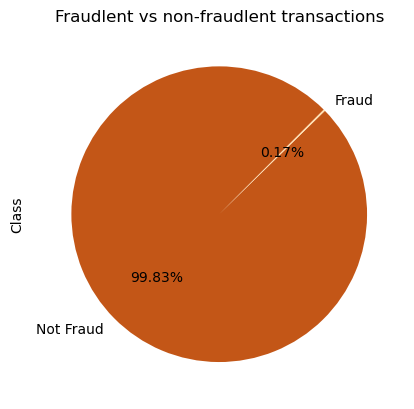

0    284315
1       492
Name: Class, dtype: int64


In [10]:
plt.title("Fraudlent vs non-fraudlent transactions")
data['Class'].value_counts().plot(kind='pie',autopct="%.2f%%",labels=['Not Fraud','Fraud'],
                                 startangle=45,colors=['#C35617','#FFDEAD'])
plt.show()
print(data.Class.value_counts())

# Count plot

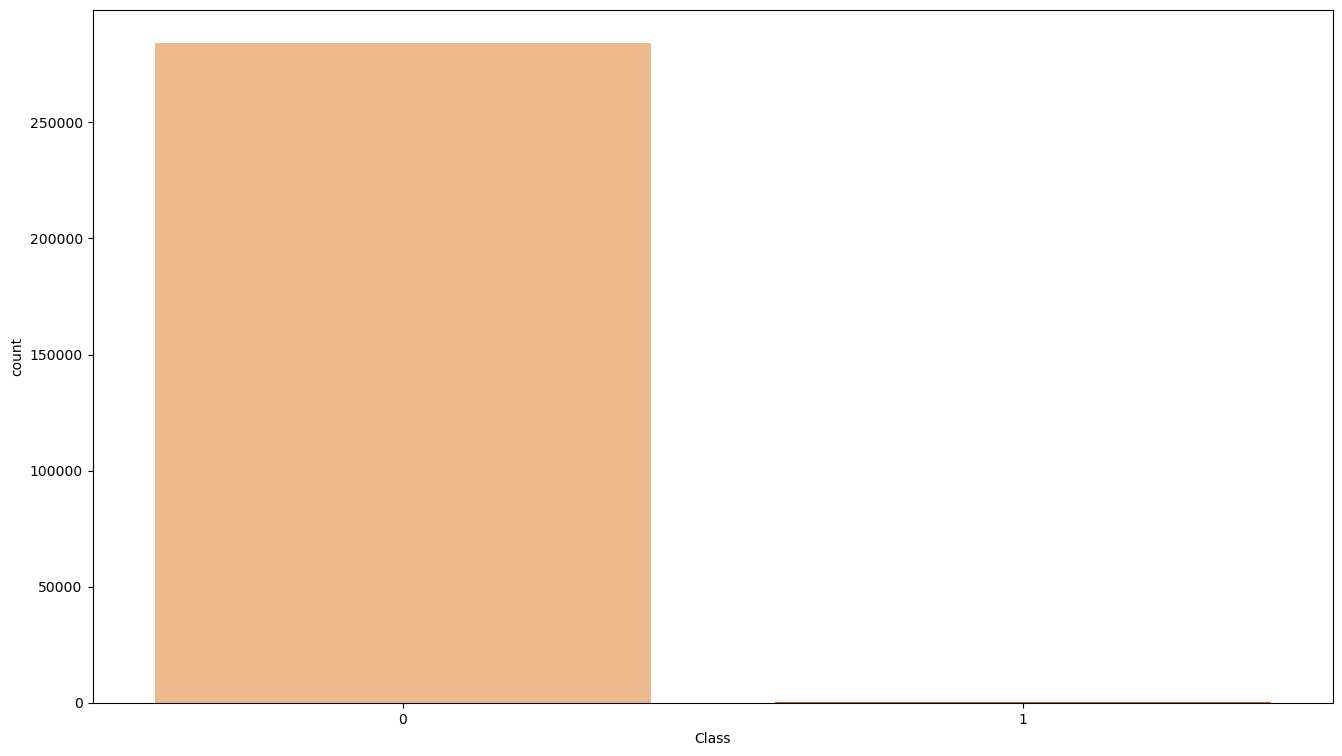

0    284315
1       492
Name: Class, dtype: int64


In [11]:
plt.figure(figsize=(16,9))
sns.countplot(x = 'Class', data = data, palette = 'Oranges')
plt.show();

print(data['Class'].value_counts())

# Bivariate analysis(b/w target and features)

In [12]:
#time statistical summary across fraud and non fraud
print ("Fraud")
print (data.Time[data.Class == 1].describe())
print ()
print ("Not Fraud")
print (data.Time[data.Class == 0].describe())

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Not Fraud
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


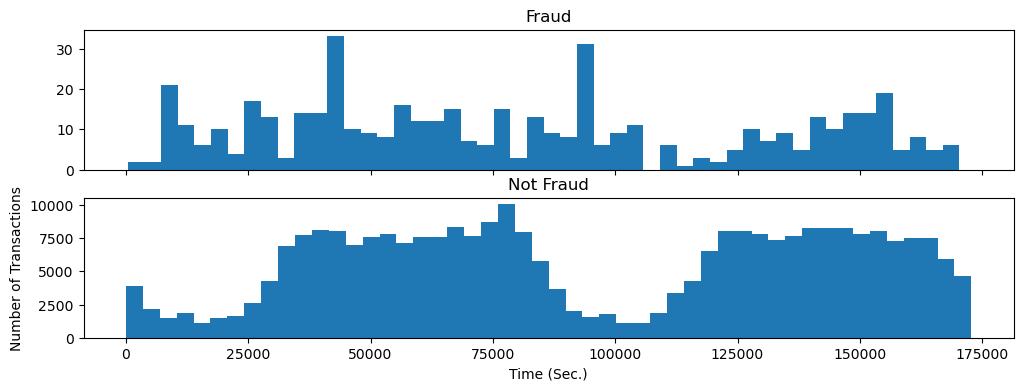

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 50

ax1.hist(data.Time[data.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data.Time[data.Class == 0], bins = bins)
ax2.set_title('Not Fraud')

plt.xlabel('Time (Sec.)')
plt.ylabel('Number of Transactions')
plt.show();

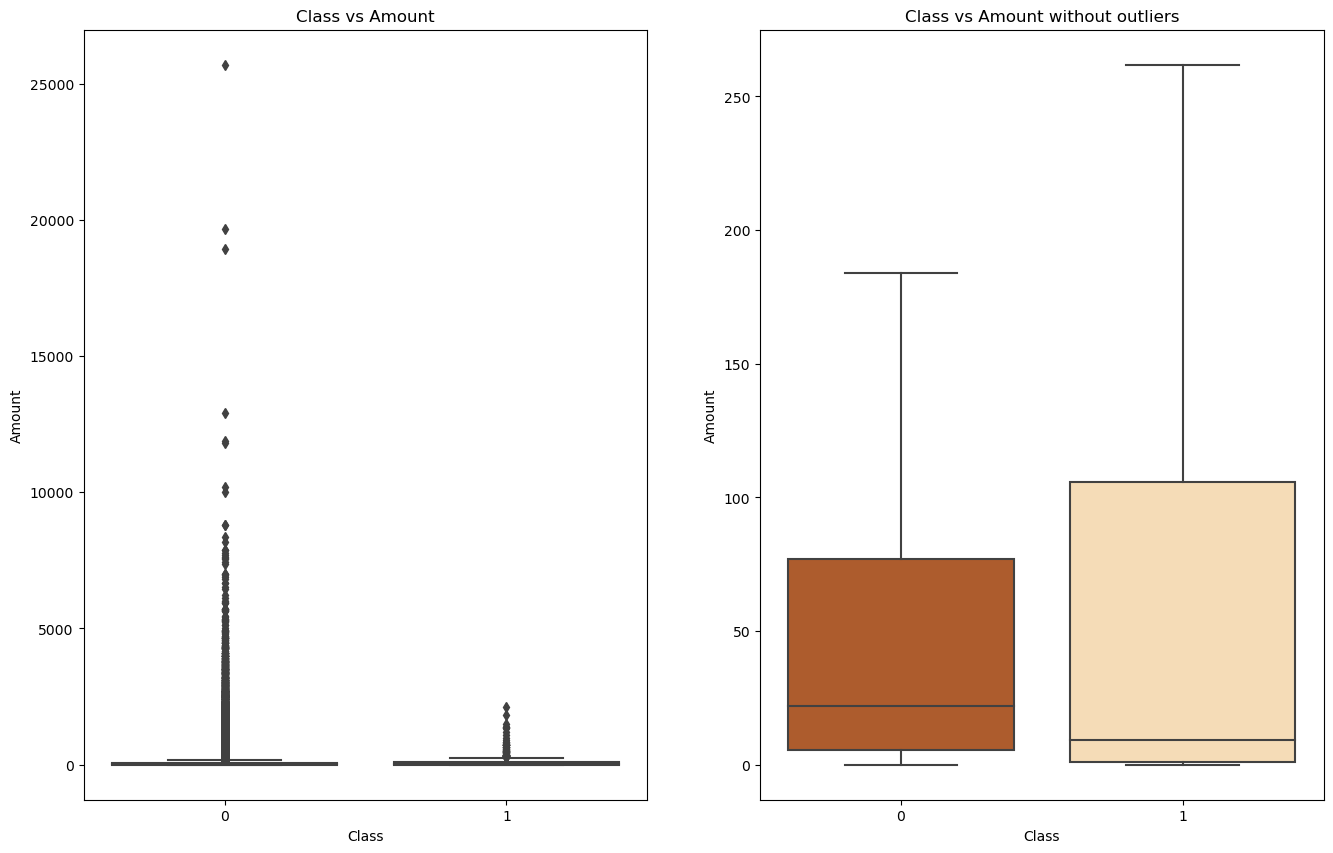

In [14]:
#used to show overall patterns of response for a group
f, axes = plt.subplots(ncols=2, figsize=(16,10))
colors = ['#C35617', '#FFDEAD']

sns.boxplot(x="Class", y="Amount", data=data, palette = colors, ax=axes[0], showfliers=True)
axes[0].set_title('Class vs Amount')

sns.boxplot(x="Class", y="Amount", data=data, palette = colors, ax=axes[1], showfliers=False)
axes[1].set_title('Class vs Amount without outliers')

plt.show();

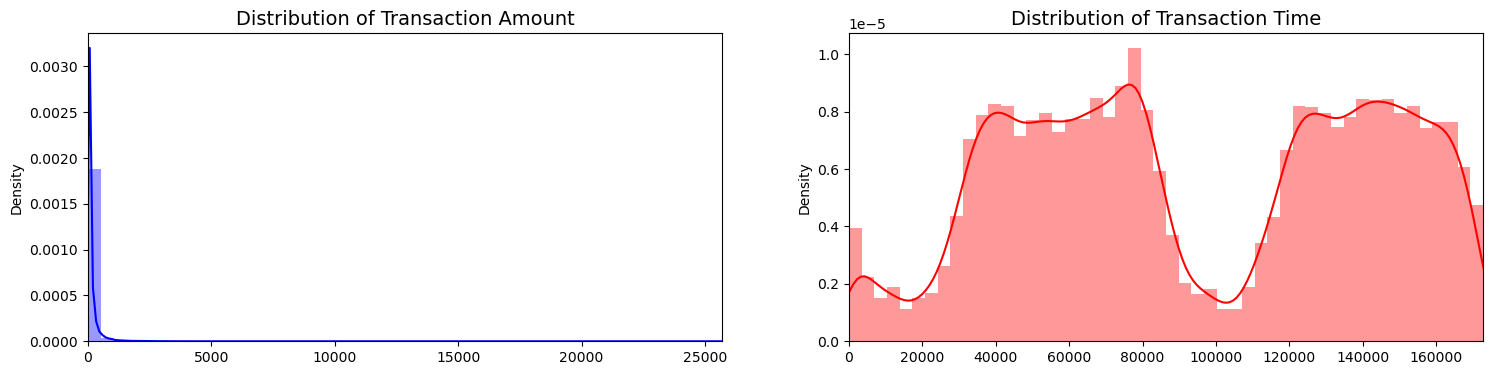

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='b')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='r')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
#allows to prepare or set the x-limits of the current axis

plt.show();

# Multivariate analysis

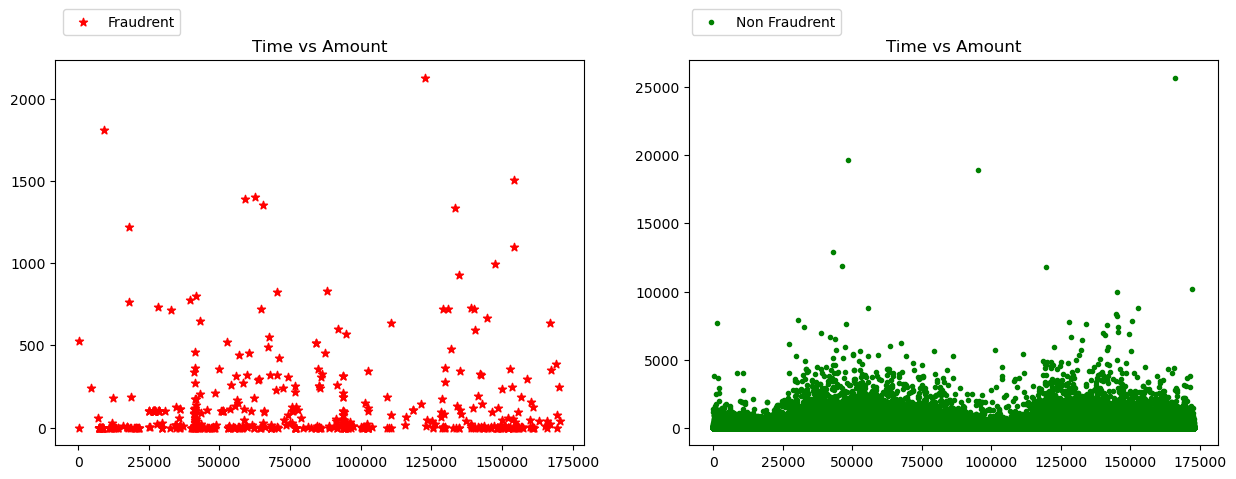

In [16]:
# plot relation with different scale
df1 = data[data['Class']==1]
df2 = data[data['Class']==0]
fig, ax = plt.subplots(1,2, figsize=(15, 5))

ax[0].scatter(df1['Time'], df1['Amount'], color='red', marker= '*', label='Fraudrent')
ax[0].set_title('Time vs Amount')
ax[0].legend(bbox_to_anchor =(0.25, 1.15))

ax[1].scatter(df2['Time'], df2['Amount'], color='green', marker= '.', label='Non Fraudrent')
ax[1].set_title('Time vs Amount')
ax[1].legend(bbox_to_anchor =(0.3, 1.15))#give meaning to visualization,assigning meaning to various plot elements

plt.show();

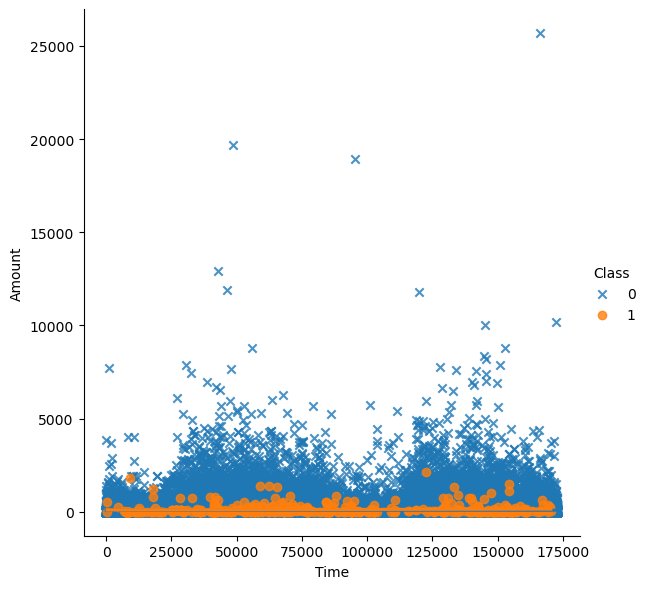

In [17]:
sns.lmplot(x='Time', y='Amount', hue='Class', markers=['x', 'o'], data=data, height=6);
#visualize a linear fit at figure level function

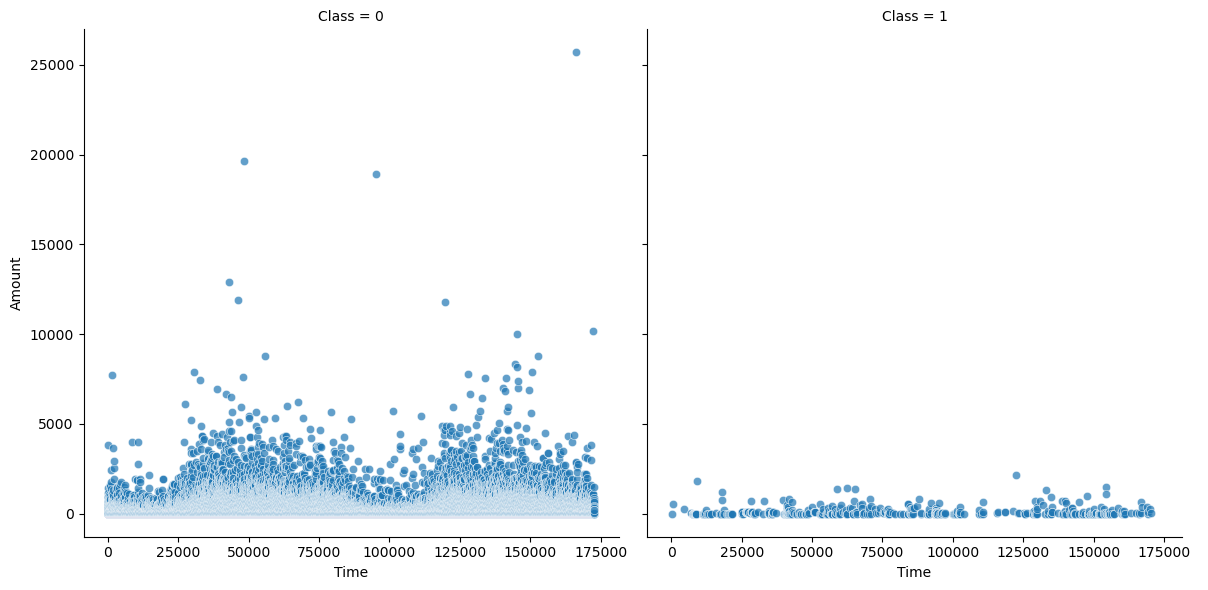

In [18]:
# plot relation in same scale
g = sns.FacetGrid(data, col="Class", height=6)
g.map(sns.scatterplot, "Time", "Amount", alpha=.7)
g.add_legend();
#facet gris is multi axes grid with subplots 
#to create a grid to map many other types of plots with minimal code

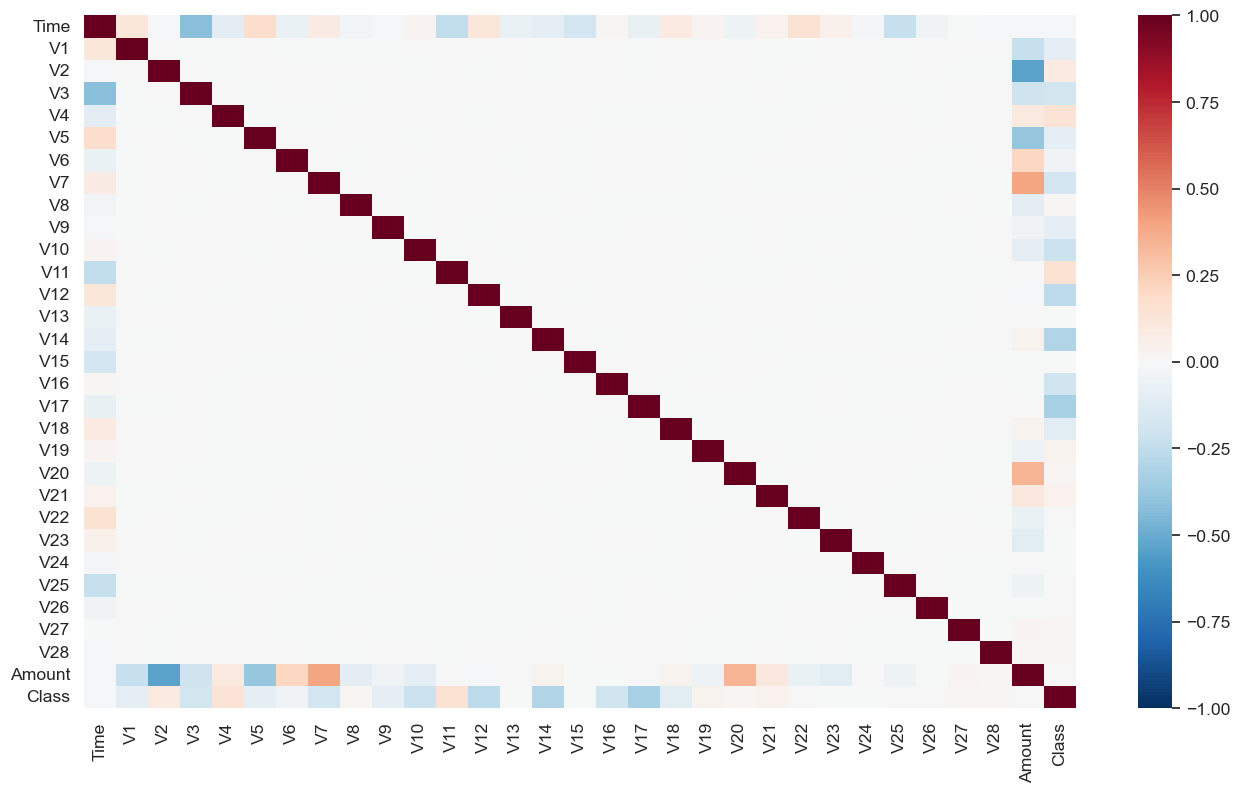

In [19]:
#two-dimensional representation of data in which values are represented by colors
sns.set(font_scale=1.15)
plt.figure(figsize=(16, 9))
sns.heatmap(data.corr(), cmap='RdBu_r', vmin=-1, vmax=1);

<Figure size 640x480 with 0 Axes>

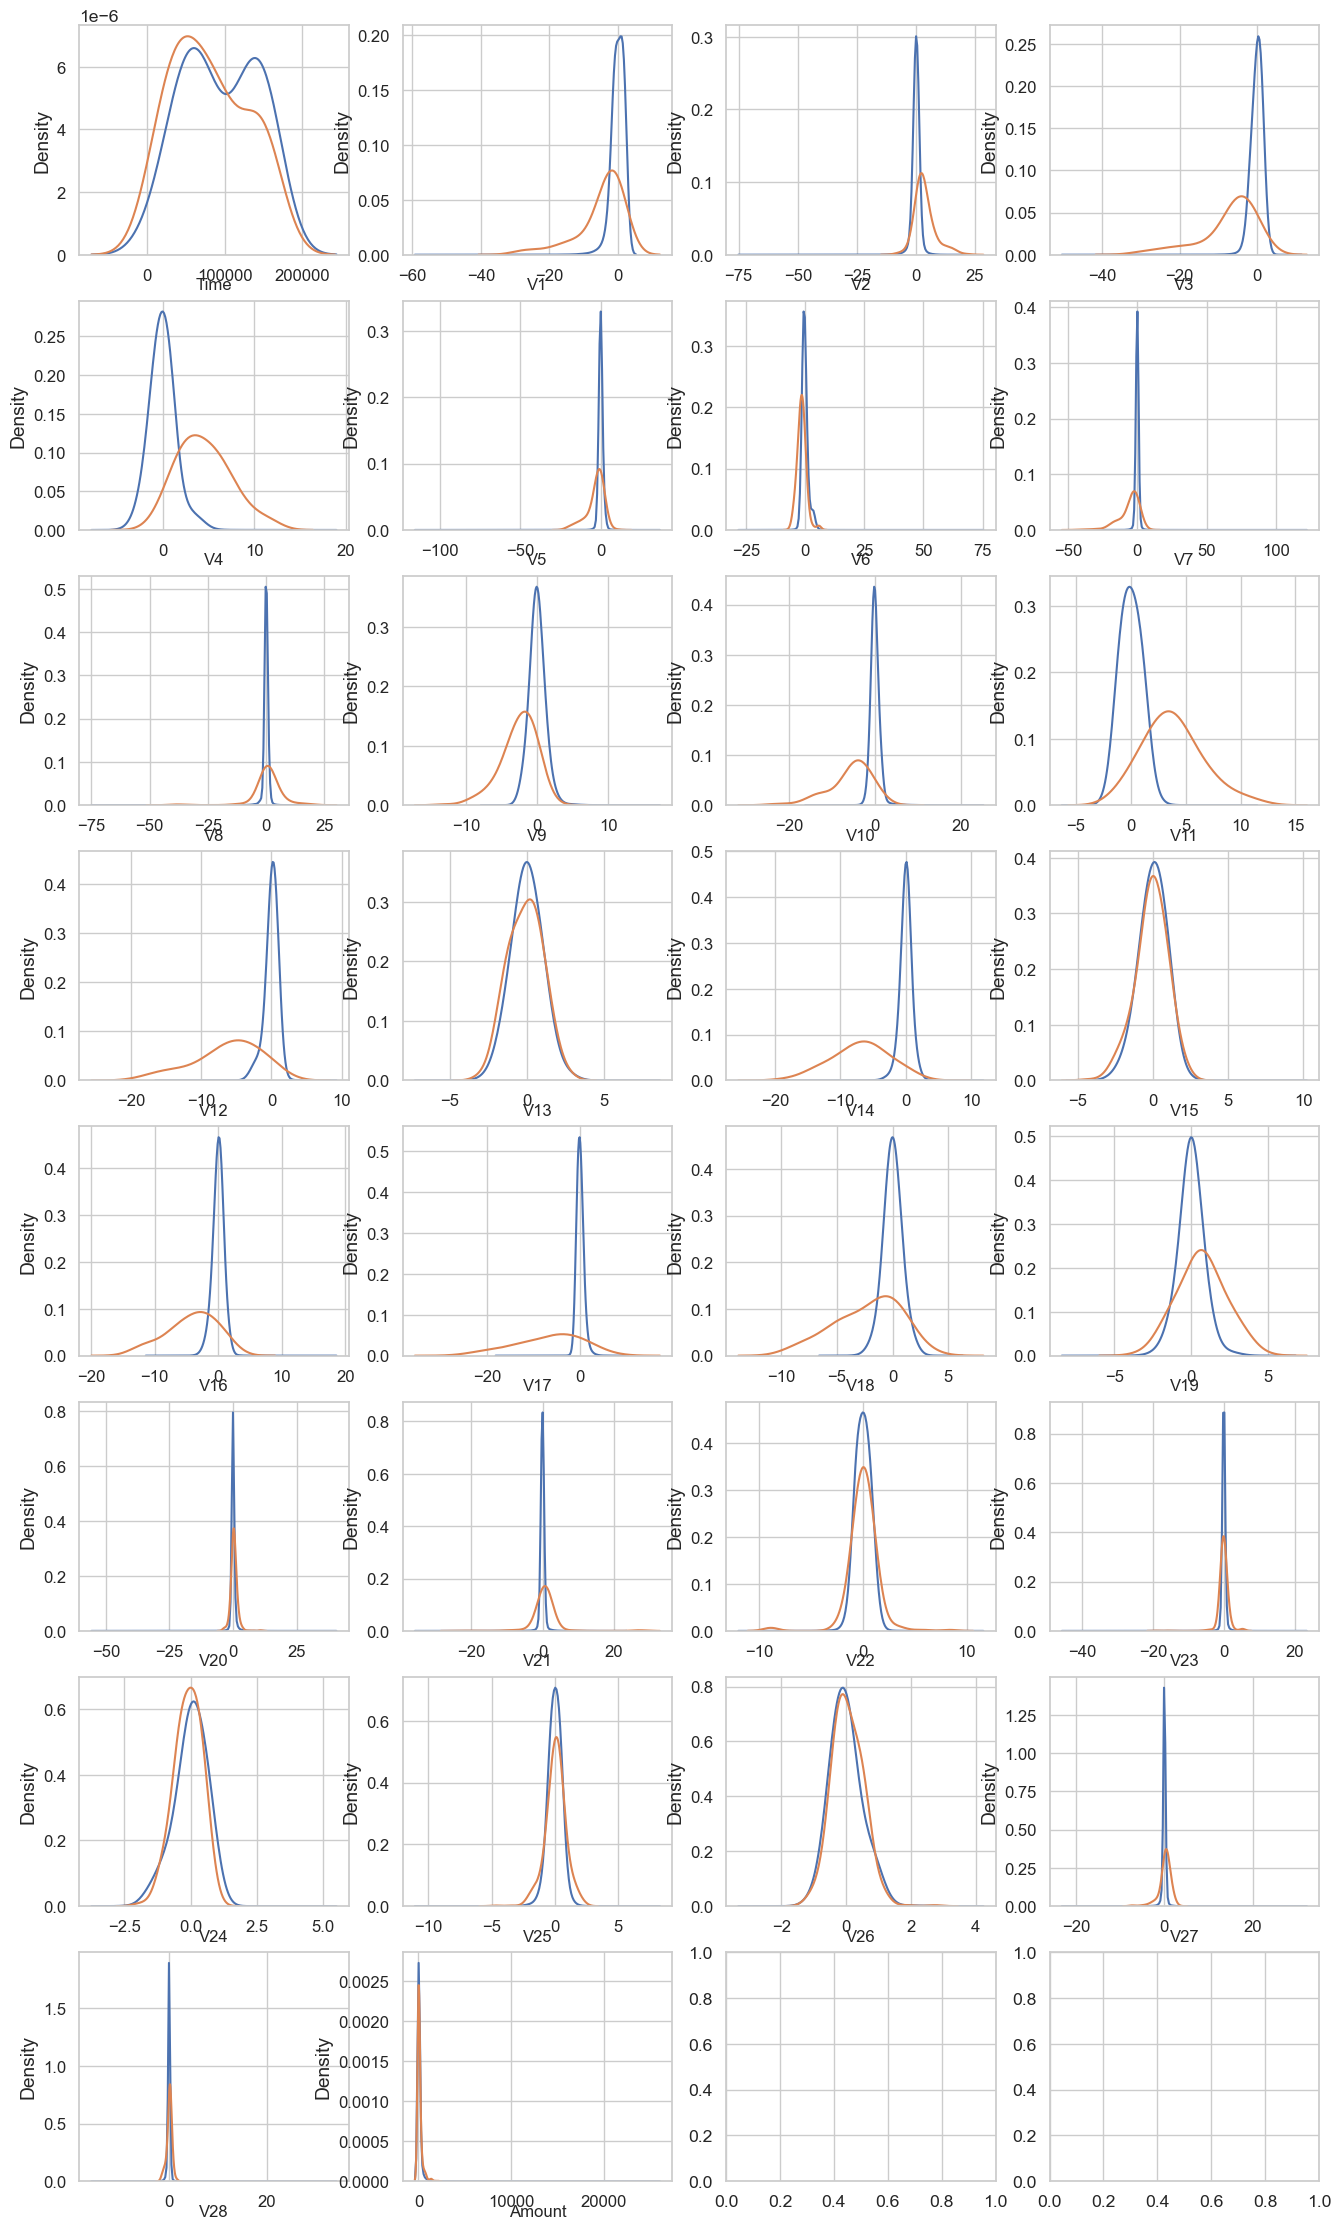

In [20]:
var = data.columns.values

i = 0
t0 = data.loc[data['Class'] == 0]
t1 = data.loc[data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4, figsize=(16,28))

for feature in var[0:-1]:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12, labelpad=-4)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

#Kernel Distribution Estimation Plot


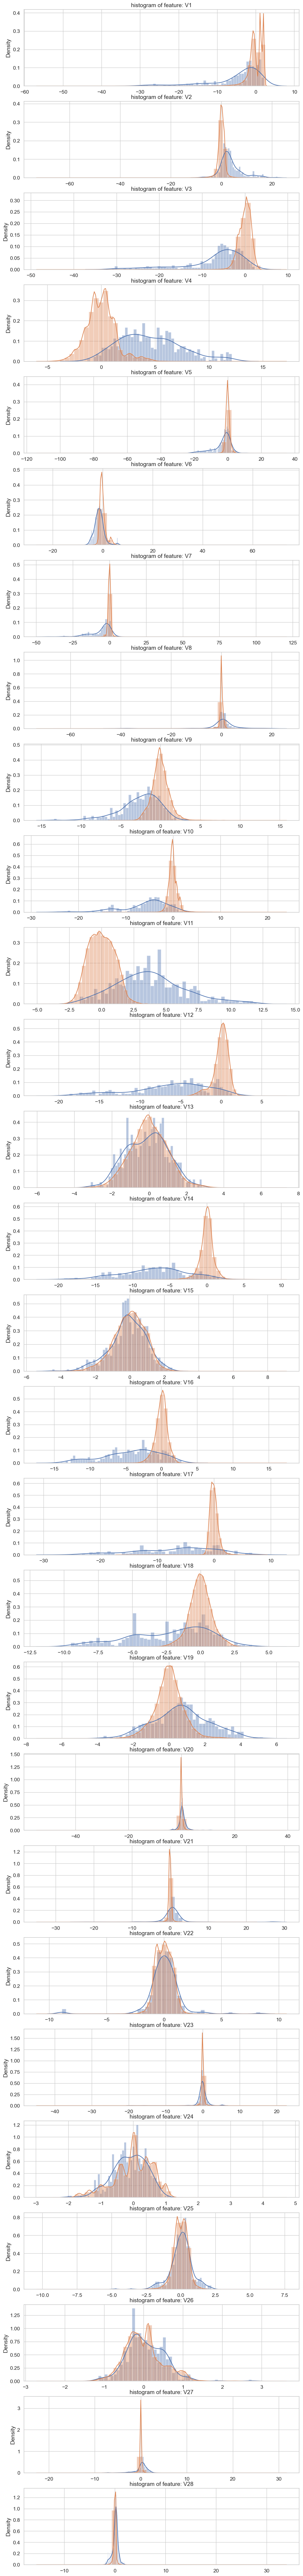

In [21]:
from matplotlib.gridspec import GridSpec
#Select only the anonymized features.
colval = var[1:29]
len(colval)

plt.figure(figsize=(12,28*4))
gs = GridSpec(28, 1)
for i, cn in enumerate(data[colval]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[cn][data.Class == 1], bins=50)
    sns.distplot(data[cn][data.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show();

#Distribution Plot

# Data transformation

In [22]:
#association between variables or features of a dataset
corr_matrix = data.corr(method = "pearson" )
corr_matrix.style.background_gradient(cmap='Oranges')

In [23]:
cor_target = data.corrwith(data["Class"])
cor_target.sort_values(axis = 0, ascending = False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
dtype: float64

In [24]:
# Creating fraudulent dataframe
data_fraud = data[data['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = data[data['Class'] == 0]

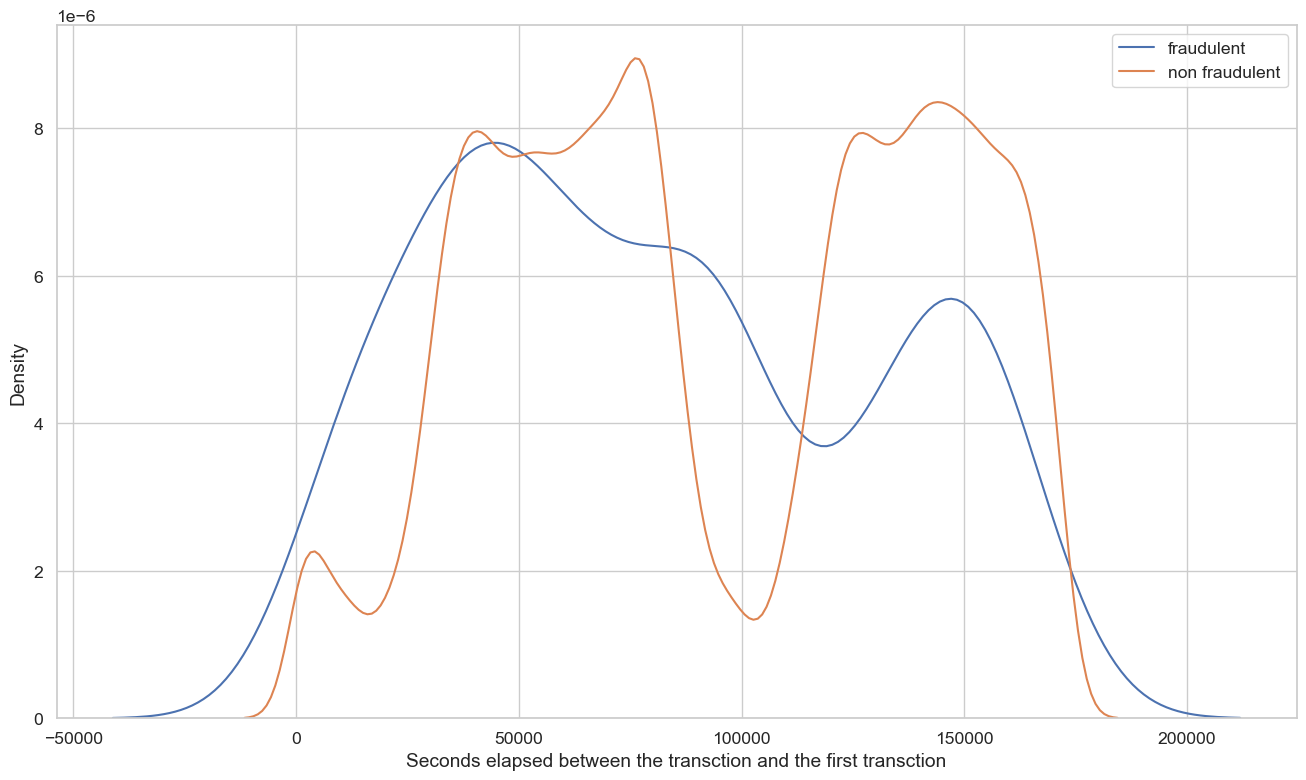

In [25]:
plt.figure(figsize=(16,9))
ax = sns.distplot(data_fraud['Time'], label='fraudulent', hist=False)
ax = sns.distplot(data_non_fraud['Time'], label='non fraudulent', hist=False)
ax.set(xlabel = 'Seconds elapsed between the transction and the first transction')
plt.legend()
plt.show();

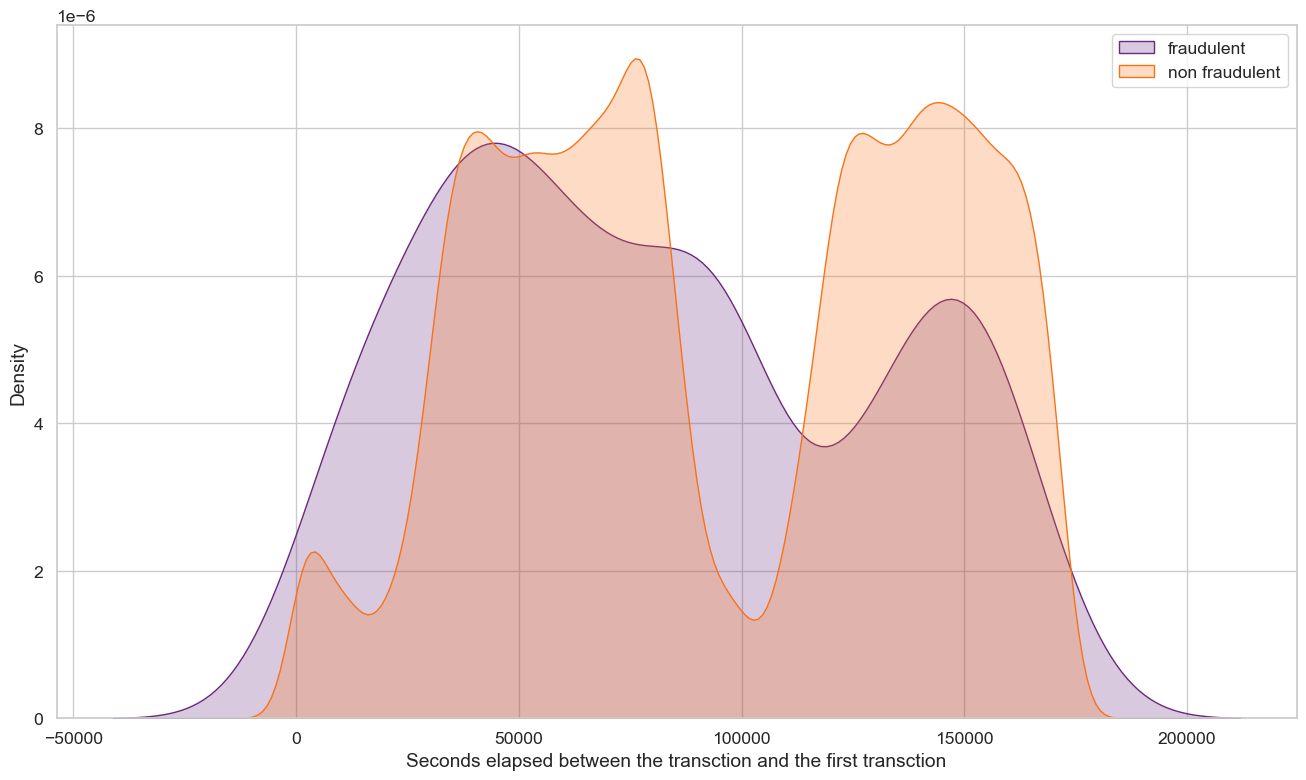

In [26]:
plt.figure(figsize=(16, 9))
ax = sns.kdeplot(data_fraud['Time'], label='fraudulent', fill = True, color = '#6A287E')
ax = sns.kdeplot(data_non_fraud['Time'], label='non fraudulent', fill = True, color = '#F87217')
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.legend()
plt.show();

In [27]:
data.drop('Time', axis=1, inplace=True)

In [28]:
data.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 30 columns]

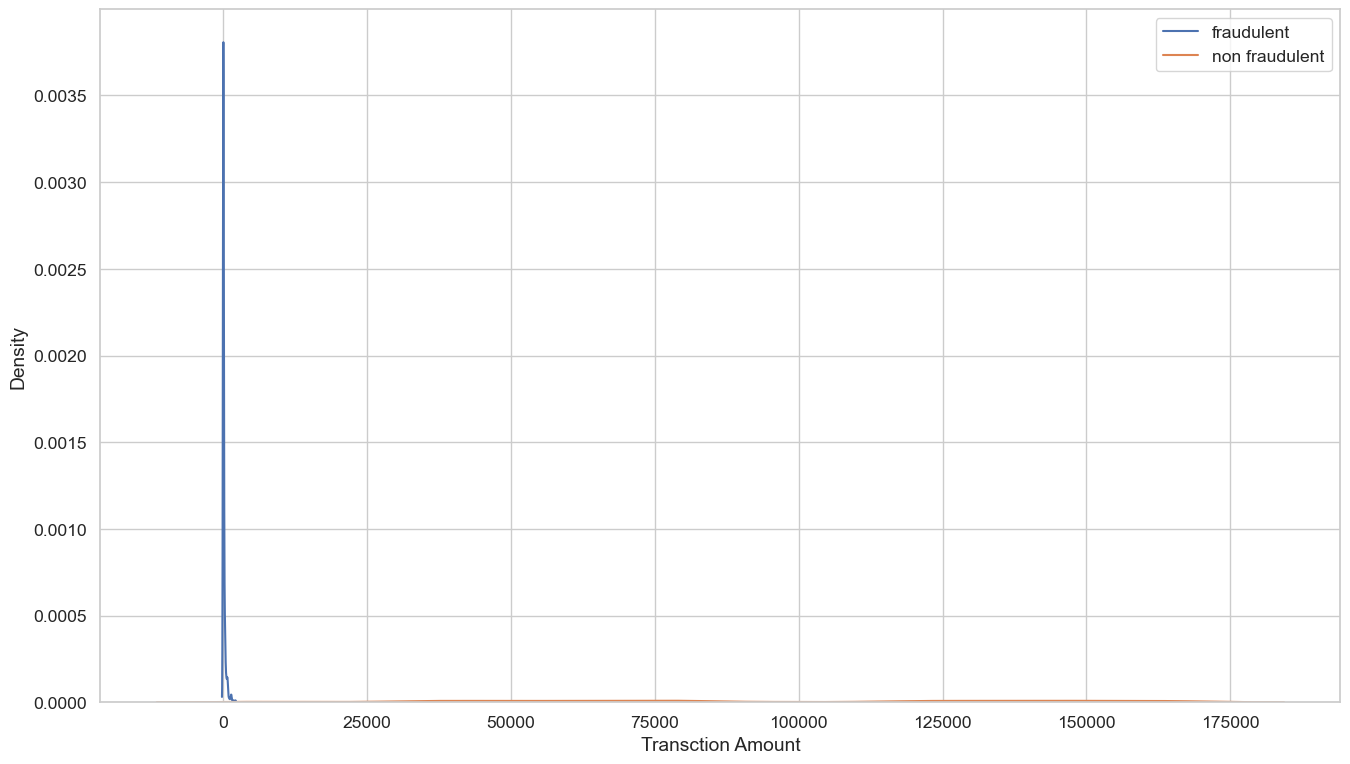

In [29]:
plt.figure(figsize=(16,9))
ax = sns.distplot(data_fraud['Amount'], label='fraudulent', hist=False)
ax = sns.distplot(data_non_fraud['Time'], label='non fraudulent', hist=False)
ax.set(xlabel='Transction Amount')
plt.legend()
plt.show();
#distribution of class vs amount

In [30]:
data.drop('Amount', axis=1, inplace=True)

In [31]:
data.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28  Class  
0  0.066928  0.128539 -0.189115  0.133558 -0.021053      0  
1 -0.339846  0.167170  0.125895 -0.008983  0.014724      0  
2 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752      0  
3 -1.175575  0.647376 -0.221929  0.062723  0.061458      0  
4  0.141267 -0.206010  0.502292  0.219422  0.215153      0  

[5 rows x 29 columns]

# Train test split

In [32]:
#putting feature variables(independent variables) into X
X = data.drop(['Class'], axis=1)
# Putting target variable(dependent variable) to y
y = data['Class']

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler
#removes the mean and scales each feature/variable to unit variance
#StandardScaler can be influenced by outliers involves emphirical mean and standard deviation
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [35]:
X_train.shape, y_train.shape

((227845, 28), (227845,))

In [36]:
X_test.shape, y_test.shape

((56962, 28), (56962,))

In [37]:
from imblearn.over_sampling import SMOTE
#solves problems that occur when using an imbalanced data set
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
#metrics for classification

In [38]:
# Instantiate SMOTE
sm = SMOTE()
# Fitting SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [39]:
from collections import Counter
#to store dictionary keys and their counts

print('Resampled dataset shape %s' % Counter(y_train_smote))
print(X_train_smote.shape)
print(y_train_smote.shape)

Resampled dataset shape Counter({0: 227451, 1: 227451})
(454902, 28)
(454902,)


In [40]:
def Visualize_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Oranges',
                xticklabels=['No Credit Card Fraud Dection','Credit Card Fraud Dection'], 
                yticklabels=['No Credit Card Fraud Dection','Credit Card Fraud Dection'])
    plt.title('Accuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    plt.show()
    
    print("\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    return

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def ROC_AUC(Y, Y_prob):
    # caculate roc curves
    fpr, tpr, threshold = roc_curve(Y, Y_prob)
    # caculate scores
    model_auc = roc_auc_score(Y, Y_prob)
    # plot roc curve for the model
    plt.figure(figsize=(16, 9))
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label='Model - AUC=%.3f' % (model_auc))
    # show axis labels and the legend
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show(block=False)
    return

# Logistic regression

In [42]:

from sklearn.linear_model import LogisticRegression
LR_model_smote = LogisticRegression(penalty='l2',C=0.01,random_state = 0)
LR_sm=LR_model_smote.fit(X_train_smote, y_train_smote)
y_train_pred = LR_model_smote.predict(X_train_smote)
y_test_pred = LR_model_smote.predict(X_test)
acc_smote_1 = accuracy_score(y_test, y_test_pred)

In [43]:
print('Recall score: %0.4f'% recall_score(y_train_smote, y_train_pred))
print('Precision score: %0.4f'% precision_score(y_train_smote, y_train_pred))
print('F1-Score: %0.4f'% f1_score(y_train_smote, y_train_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_train_smote, y_train_pred))
print('AUC: %0.4f' % roc_auc_score(y_train_smote, y_train_pred))

Recall score: 0.9212
Precision score: 0.9730
F1-Score: 0.9463
Accuracy score: 0.9478
AUC: 0.9478


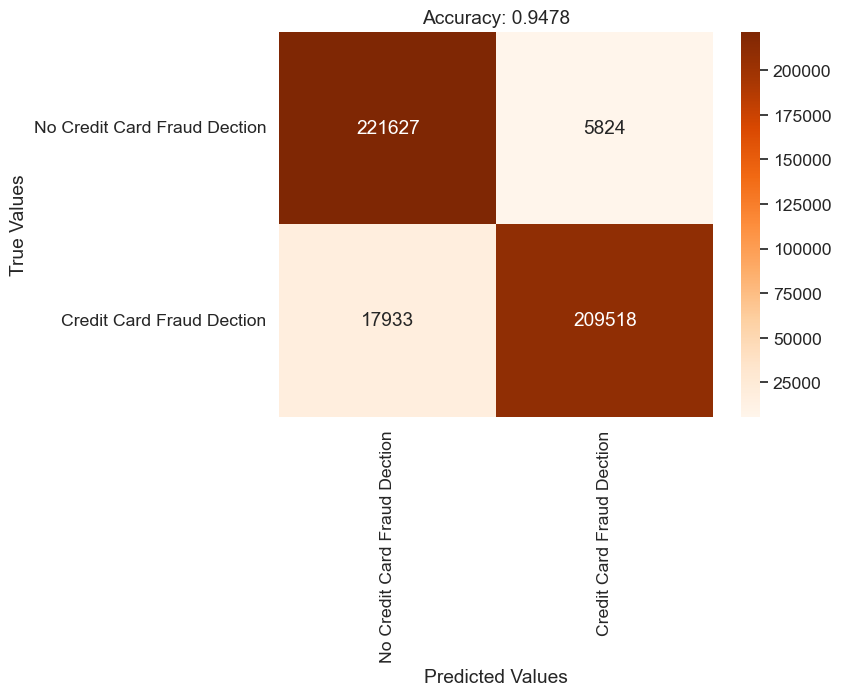



Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95    227451
           1       0.97      0.92      0.95    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



In [44]:
Visualize_confusion_matrix(y_train_smote, y_train_pred)

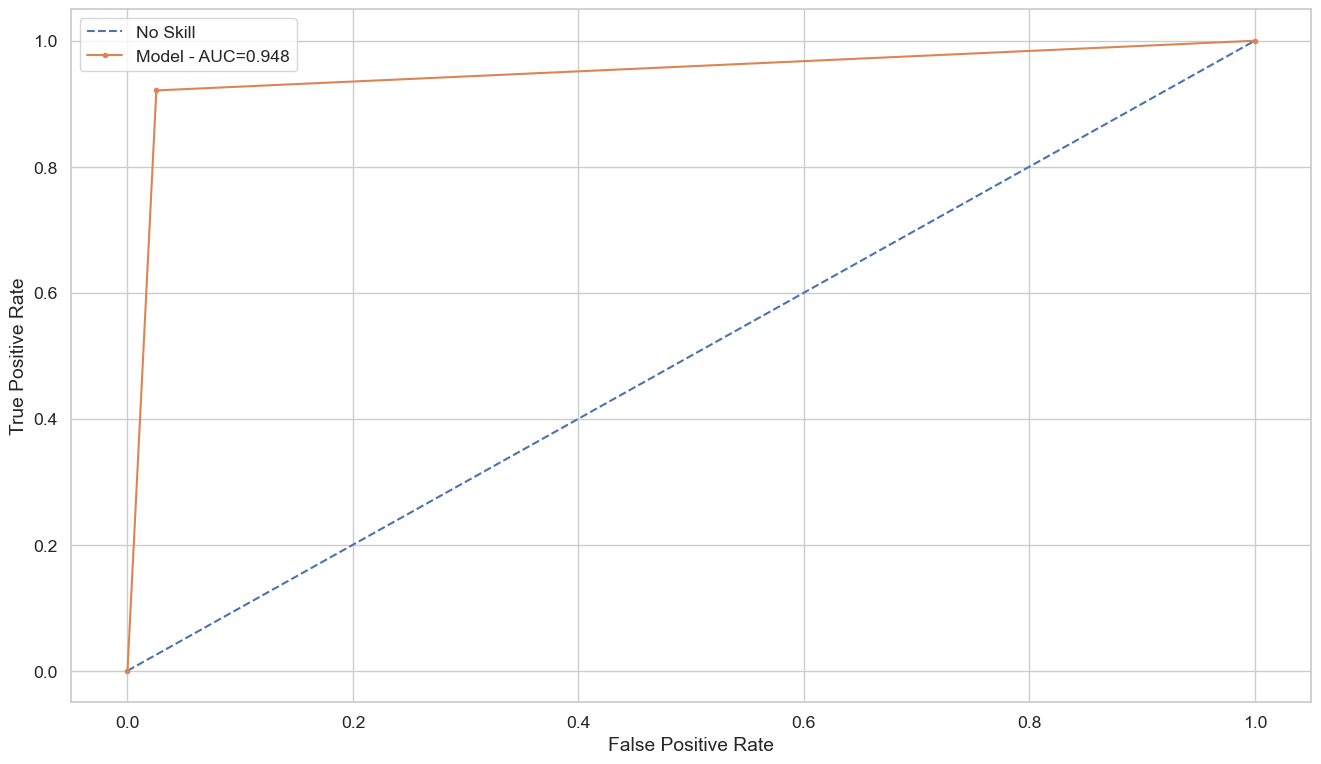

In [45]:
ROC_AUC(y_train_smote, y_train_pred)

In [46]:
a1=print('Recall score: %0.4f'% recall_score(y_test, y_test_pred))
b1=print('Precision score: %0.4f'% precision_score(y_test, y_test_pred))
c1=print('F1-Score: %0.4f'% f1_score(y_test, y_test_pred))
d1=print('Accuracy score: %0.4f'% accuracy_score(y_test, y_test_pred))
e1=print('AUC: %0.4f' % roc_auc_score(y_test, y_test_pred))
print()
a1=(round(recall_score(y_test, y_test_pred),4))
b1=(round(precision_score(y_test, y_test_pred),4))
c1=(round(f1_score(y_test, y_test_pred),4))
d1=(round(accuracy_score(y_test, y_test_pred),4))
e1=(round(roc_auc_score(y_test, y_test_pred),4))

Recall score: 0.9184
Precision score: 0.0560
F1-Score: 0.1056
Accuracy score: 0.9732
AUC: 0.9459



In [47]:
print(a1)
print(b1)
print(c1)
print(d1)
print(e1)

0.9184
0.056
0.1056
0.9732
0.9459


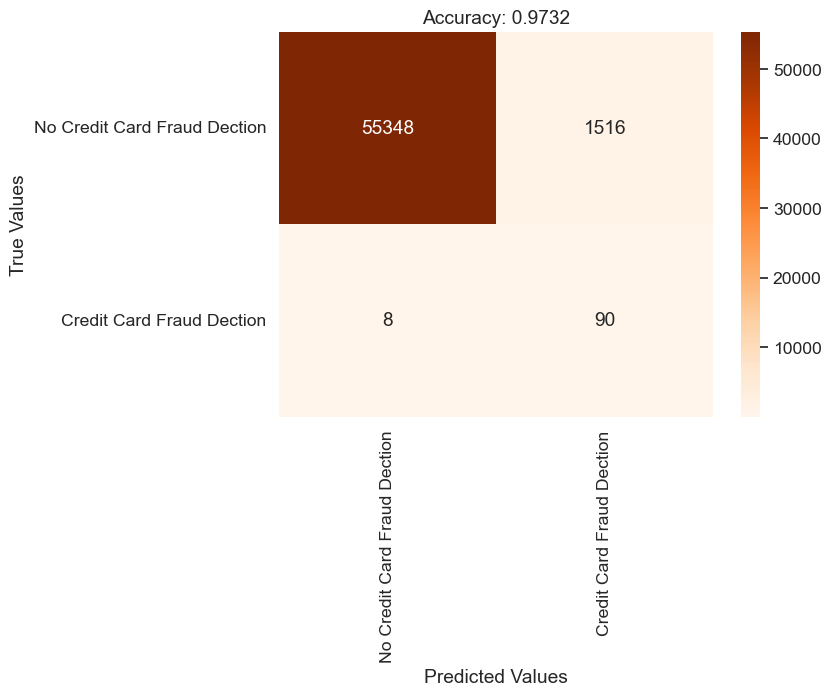



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962



In [48]:
Visualize_confusion_matrix(y_test, y_test_pred)

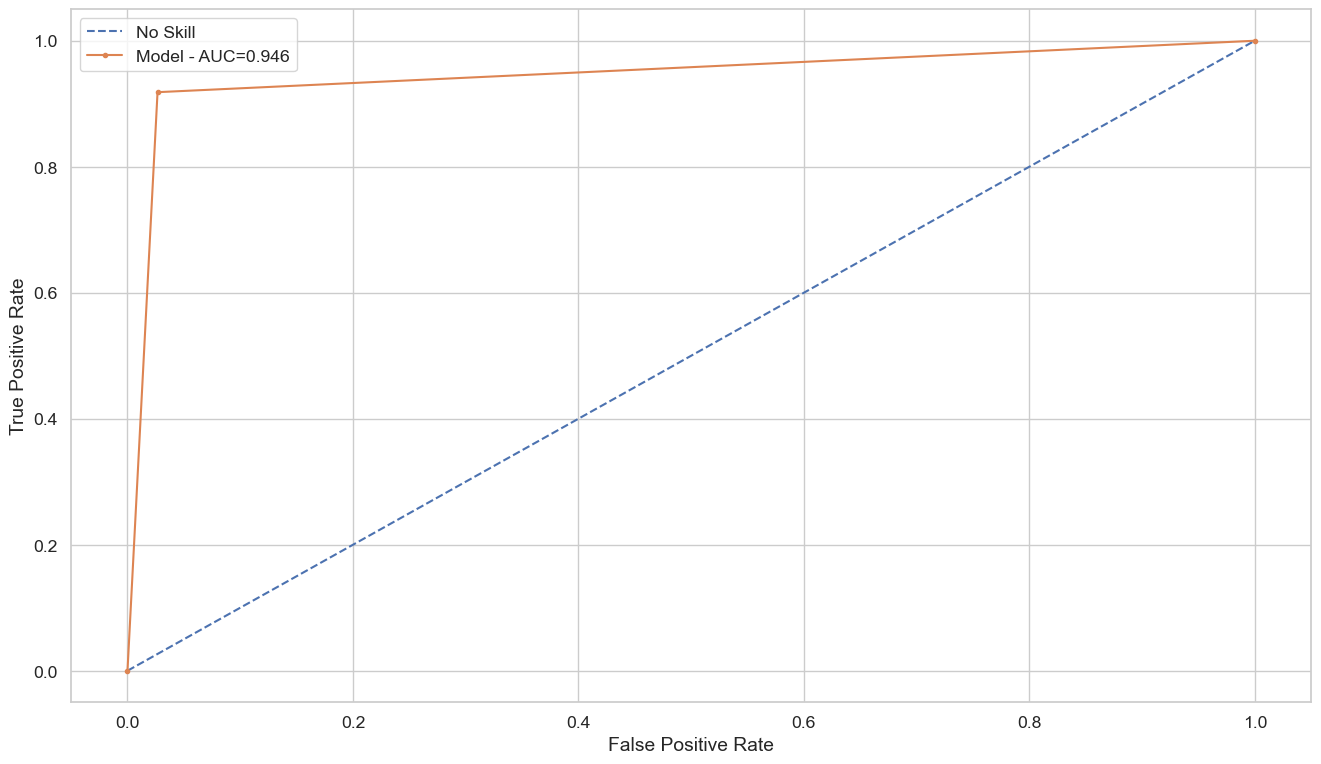

In [49]:
ROC_AUC(y_test, y_test_pred)

# Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB
NB_model_smote = GaussianNB()
NB_model_smote.fit(X_train_smote, y_train_smote)
y_train_pred = NB_model_smote.predict(X_train_smote)
y_test_pred = NB_model_smote.predict(X_test)
acc_smote_2 = accuracy_score(y_test, y_test_pred)

In [51]:
print('Recall score: %0.4f'% recall_score(y_train_smote, y_train_pred))
print('Precision score: %0.4f'% precision_score(y_train_smote, y_train_pred))
print('F1-Score: %0.4f'% f1_score(y_train_smote, y_train_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_train_smote, y_train_pred))
print('AUC: %0.4f' % roc_auc_score(y_train_smote, y_train_pred))

Recall score: 0.8474
Precision score: 0.9711
F1-Score: 0.9050
Accuracy score: 0.9111
AUC: 0.9111


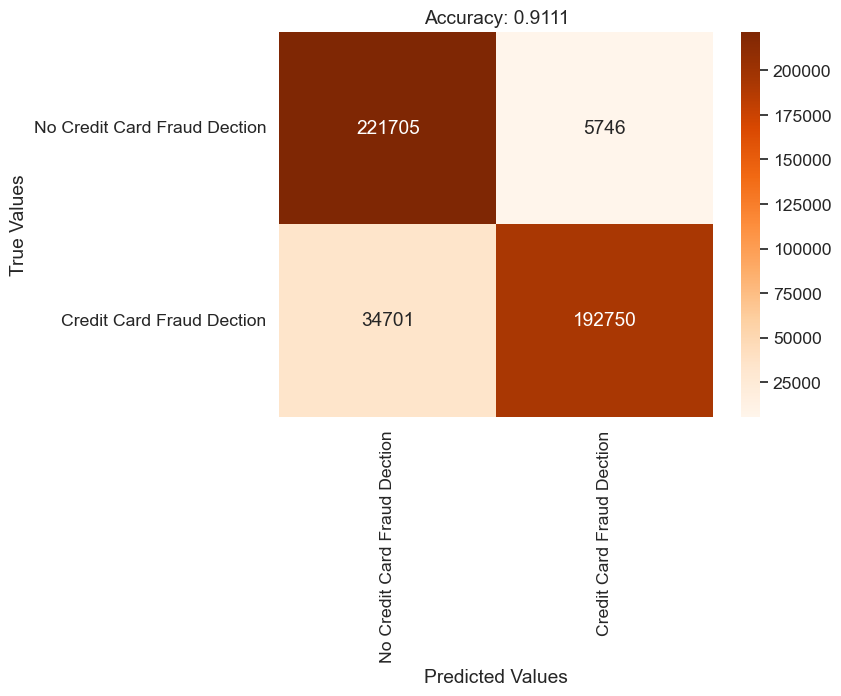



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.92    227451
           1       0.97      0.85      0.91    227451

    accuracy                           0.91    454902
   macro avg       0.92      0.91      0.91    454902
weighted avg       0.92      0.91      0.91    454902



In [52]:
Visualize_confusion_matrix(y_train_smote, y_train_pred)

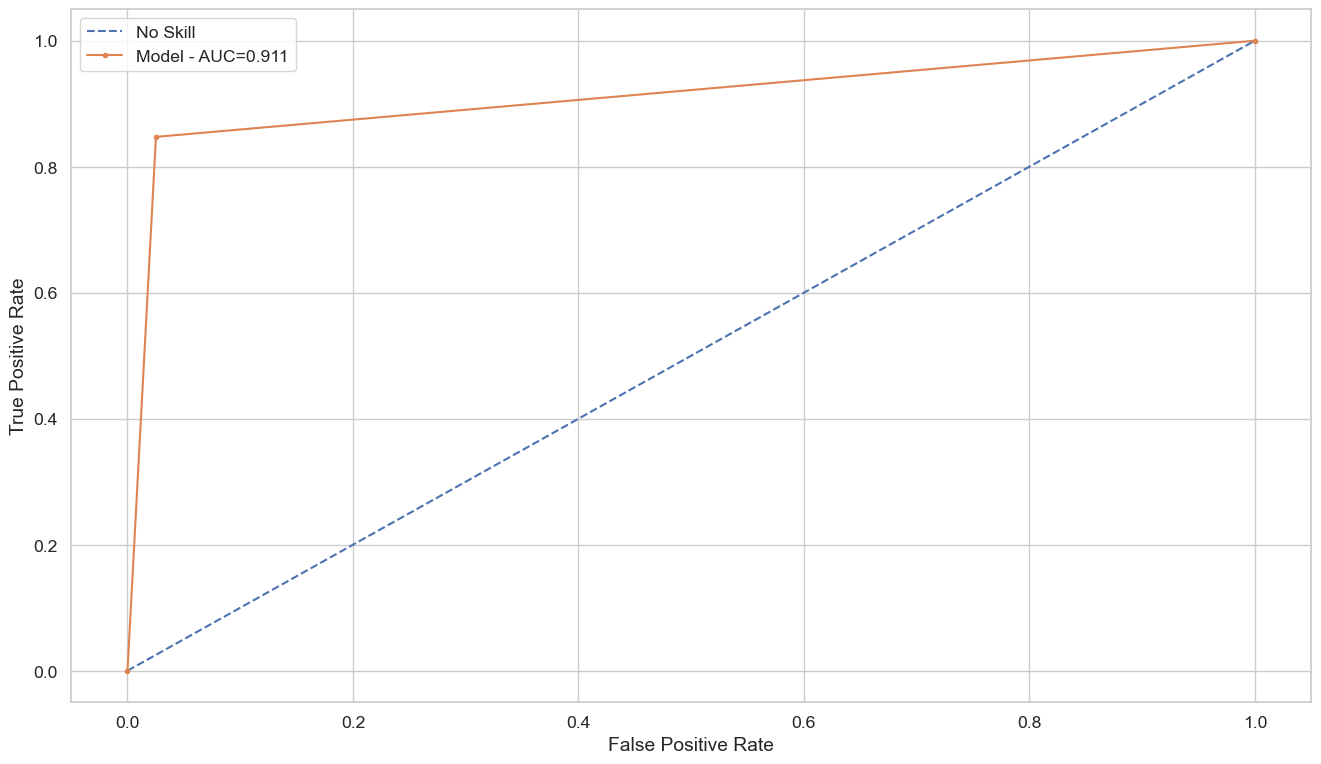

In [53]:
ROC_AUC(y_train_smote, y_train_pred)

In [54]:
print('Recall score: %0.4f'% recall_score(y_test, y_test_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_test_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_test_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_test_pred))
print('AUC: %0.4f' % roc_auc_score(y_test, y_test_pred))
a2=(round(recall_score(y_test, y_test_pred),4))
b2=(round(precision_score(y_test, y_test_pred),4))
c2=(round(f1_score(y_test, y_test_pred),4))
d2=(round(accuracy_score(y_test, y_test_pred),4))
e2=(round(roc_auc_score(y_test, y_test_pred),4))

Recall score: 0.8776
Precision score: 0.0531
F1-Score: 0.1001
Accuracy score: 0.9728
AUC: 0.9253


In [55]:
print(a2)
print(b2)
print(c2)
print(d2)
print(e2)

0.8776
0.0531
0.1001
0.9728
0.9253


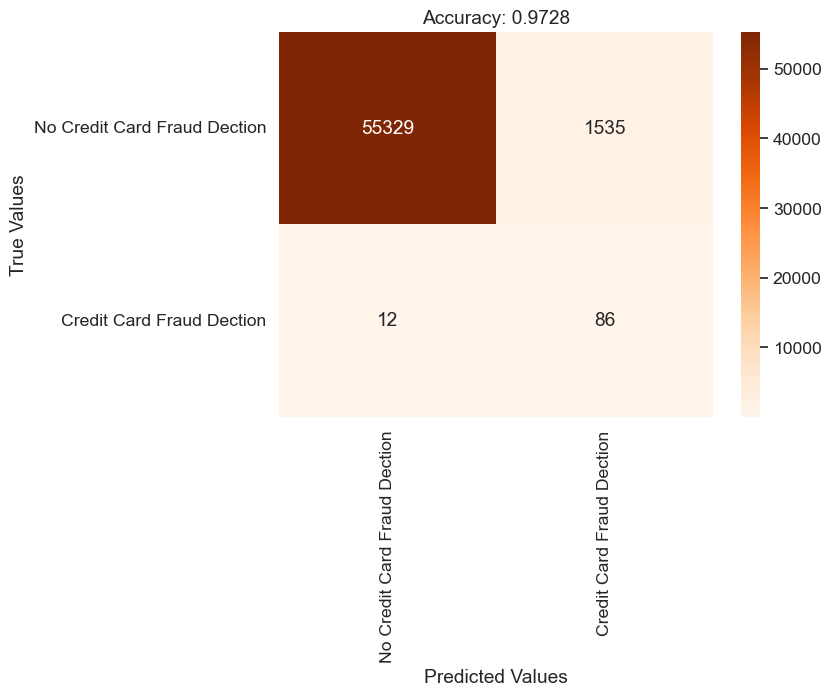



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.88      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.93      0.54     56962
weighted avg       1.00      0.97      0.98     56962



In [56]:
Visualize_confusion_matrix(y_test, y_test_pred)

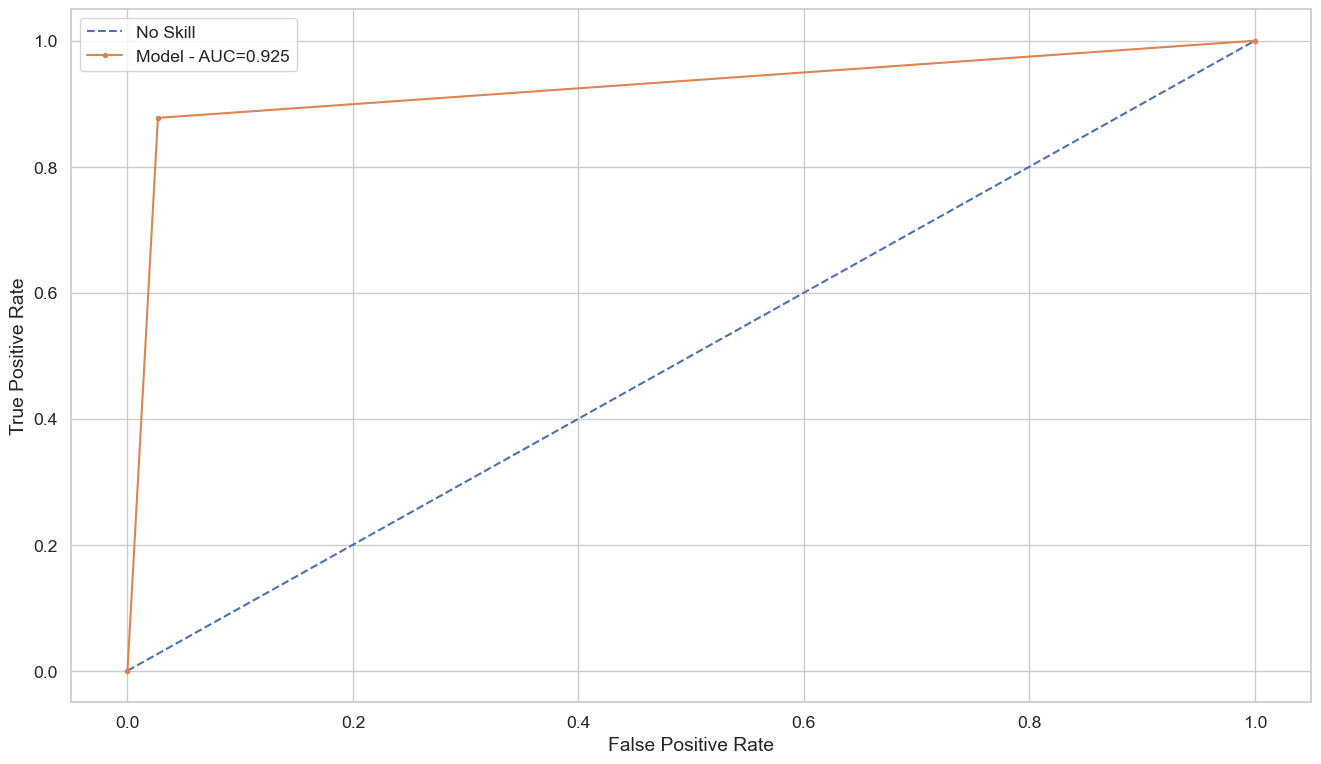

In [57]:
ROC_AUC(y_test, y_test_pred)

# Decision tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
DTR_model_smote = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
DTR_model_smote.fit(X_train_smote, y_train_smote)
y_train_pred = DTR_model_smote.predict(X_train_smote)
y_test_pred = DTR_model_smote.predict(X_test)
acc_smote_4 = accuracy_score(y_test, y_test_pred)

In [59]:
print('Recall score: %0.4f'% recall_score(y_train_smote, y_train_pred))
print('Precision score: %0.4f'% precision_score(y_train_smote, y_train_pred))
print('F1-Score: %0.4f'% f1_score(y_train_smote, y_train_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_train_smote, y_train_pred))
print('AUC: %0.4f' % roc_auc_score(y_train_smote, y_train_pred))

Recall score: 1.0000
Precision score: 1.0000
F1-Score: 1.0000
Accuracy score: 1.0000
AUC: 1.0000


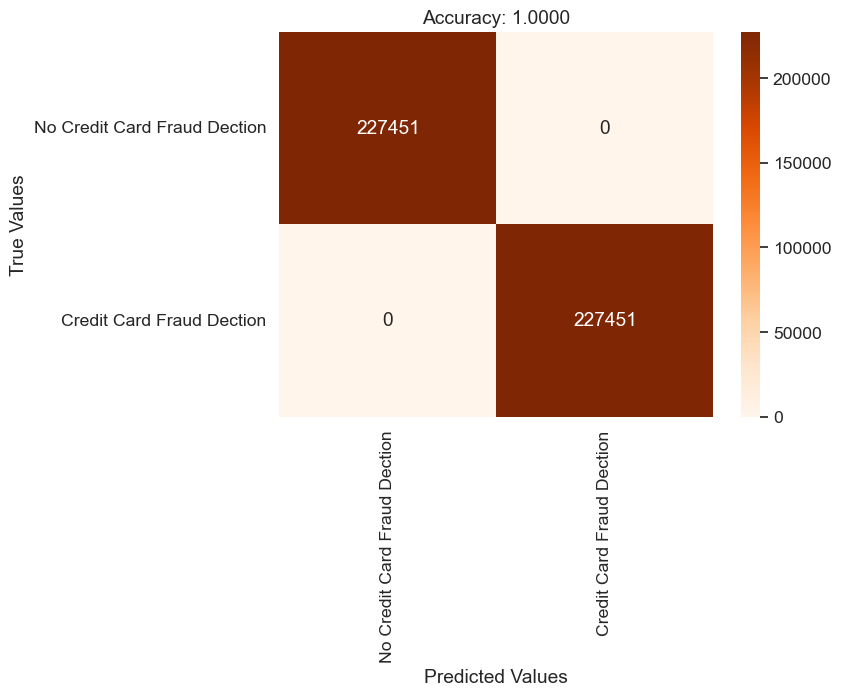



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



In [60]:
Visualize_confusion_matrix(y_train_smote, y_train_pred)

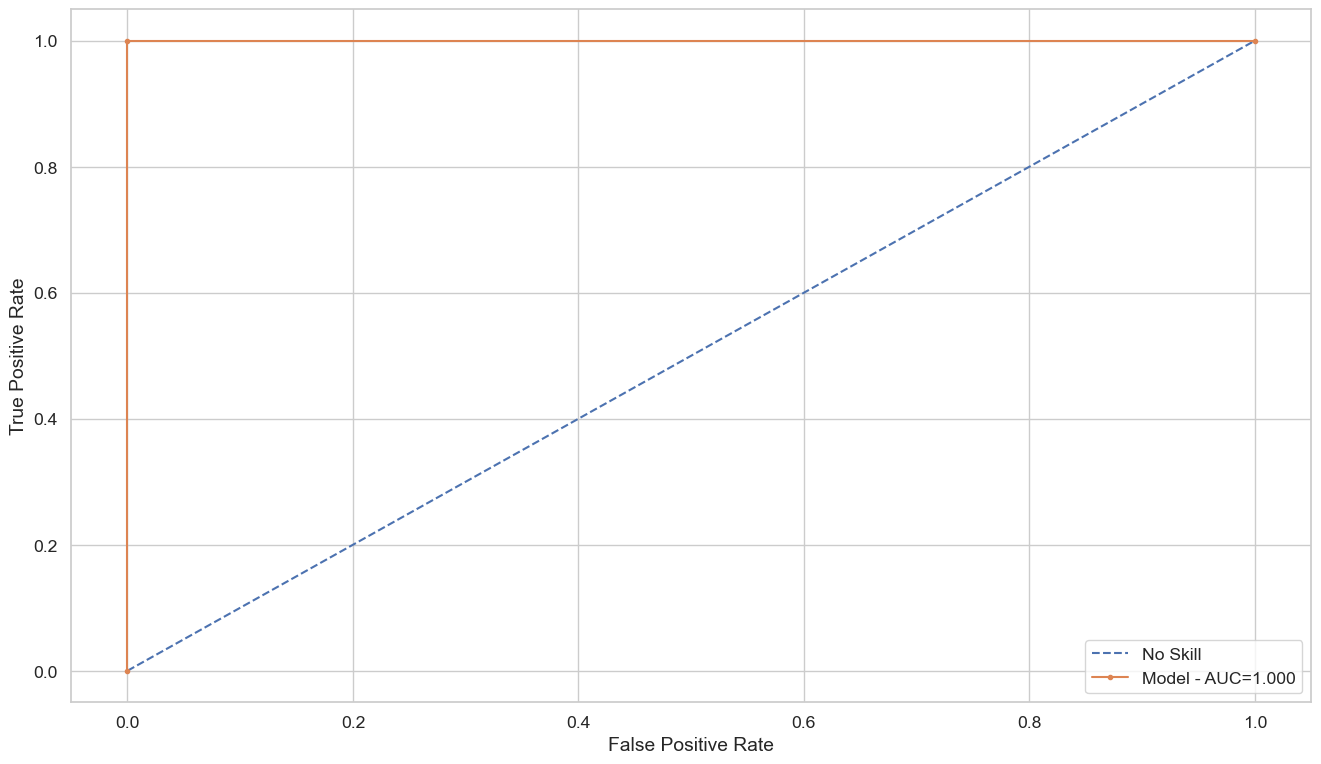

In [61]:
ROC_AUC(y_train_smote, y_train_pred)

In [62]:
print('Recall score: %0.4f'% recall_score(y_test, y_test_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_test_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_test_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_test_pred))
print('AUC: %0.4f' % roc_auc_score(y_test, y_test_pred))
a3=(round(recall_score(y_test, y_test_pred),4))
b3=(round(precision_score(y_test, y_test_pred),4))
c3=(round(f1_score(y_test, y_test_pred),4))
d3=(round(accuracy_score(y_test, y_test_pred),4))
e3=(round(roc_auc_score(y_test, y_test_pred),4))

Recall score: 0.7959
Precision score: 0.3959
F1-Score: 0.5288
Accuracy score: 0.9976
AUC: 0.8969


In [63]:
print(a3)
print(b3)
print(c3)
print(d3)
print(e3)

0.7959
0.3959
0.5288
0.9976
0.8969


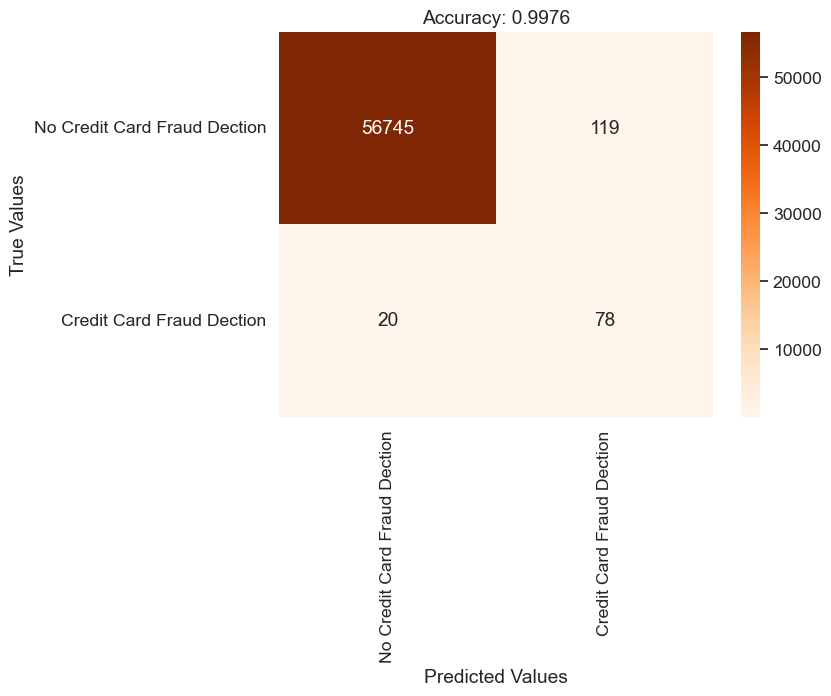



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.40      0.80      0.53        98

    accuracy                           1.00     56962
   macro avg       0.70      0.90      0.76     56962
weighted avg       1.00      1.00      1.00     56962



In [64]:
Visualize_confusion_matrix(y_test, y_test_pred)

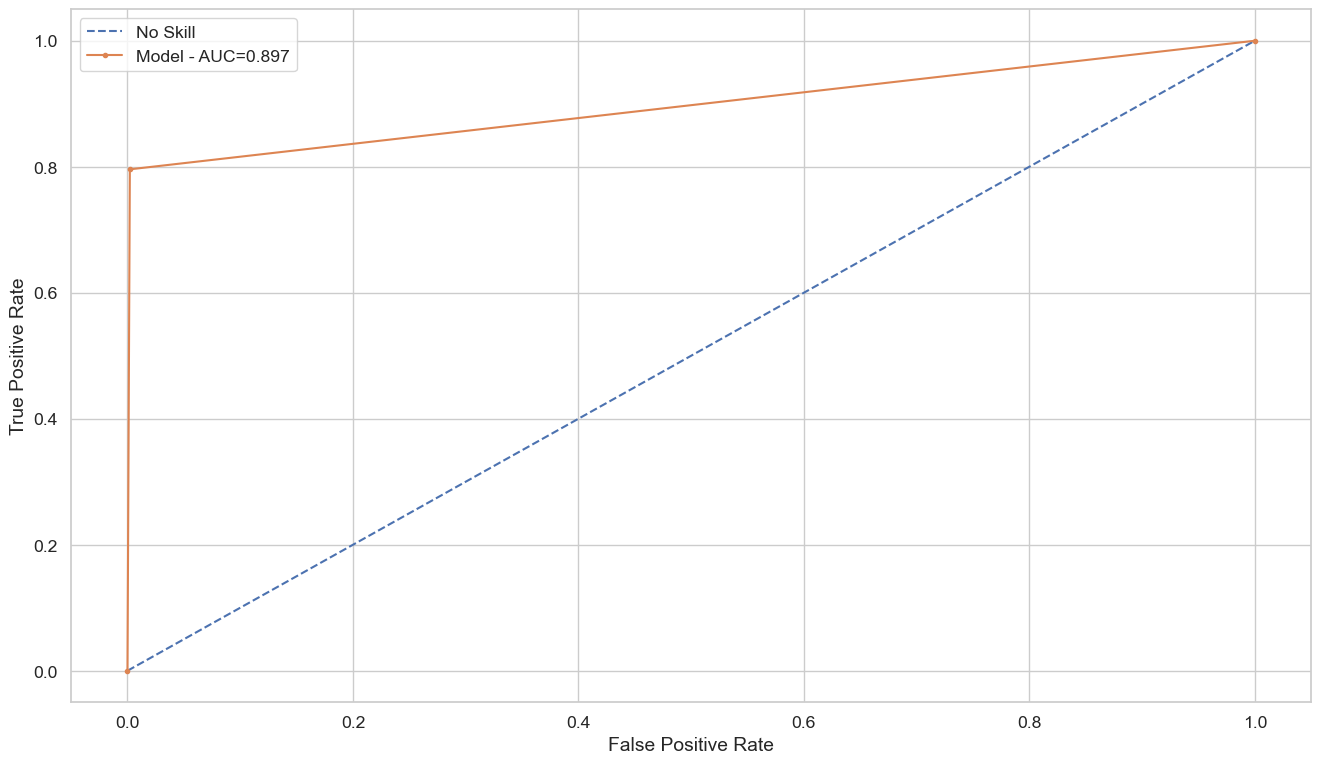

In [65]:
ROC_AUC(y_test, y_test_pred)

[Text(0.3258092522120576, 0.9833333333333333, '[-0.40076036  0.42195565  1.18452495  0.03053188 -0.16306791 -0.13672782\n  0.49805851  0.1502804   0.19340318 -0.51400347 -1.5364211  -1.12533228\n -2.04625832  0.13260015 -0.01934936 -0.0939521  -0.01050795 -0.14752397\n  0.77634026  0.13828635 -0.44185305 -1.21193486 -0.24111834 -0.26886316\n  0.62905742  0.55530503  0.58973806  0.36779346] <= -1.901\nentropy = 1.0\nsamples = 454902\nvalue = [227451, 227451]'),
 Text(0.11277744451109778, 0.95, '[ 0.96671407 -0.77032938  0.58193374  0.6739905  -1.17548522  1.07756124\n -1.58867087  0.47407098  0.90537412  0.70560356 -0.28726633  1.51912536\n  0.77401183 -1.41541567 -2.71767588 -1.76707028 -0.09884491  2.3424756\n -0.77621309 -0.75618391 -0.24924666  0.64170337  0.34295531  1.26230327\n -0.45538702 -1.10291307  0.3817744  -0.03829282] <= -1.857\nentropy = 0.203\nsamples = 205637\nvalue = [6514, 199123]'),
 Text(0.07003599280143971, 0.9166666666666666, '[ 1.0072775  -0.24505901 -0.14630174

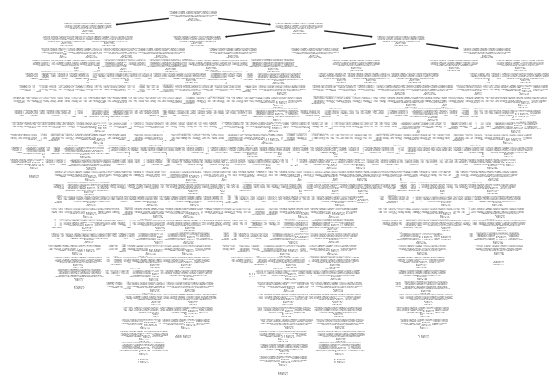

In [66]:
from sklearn import tree
tree.plot_tree(DTR_model_smote, feature_names=X_train_smote)

In [67]:
DTR_model_smote= DecisionTreeClassifier(criterion="entropy",max_depth=3)
DTR_model_smote.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [68]:
y_test_pred = DTR_model_smote.predict(X_test)

[Text(0.5, 0.875, '[-0.40076036  0.42195565  1.18452495  0.03053188 -0.16306791 -0.13672782\n  0.49805851  0.1502804   0.19340318 -0.51400347 -1.5364211  -1.12533228\n -2.04625832  0.13260015 -0.01934936 -0.0939521  -0.01050795 -0.14752397\n  0.77634026  0.13828635 -0.44185305 -1.21193486 -0.24111834 -0.26886316\n  0.62905742  0.55530503  0.58973806  0.36779346] <= -1.901\nentropy = 1.0\nsamples = 454902\nvalue = [227451, 227451]'),
 Text(0.25, 0.625, '[ 0.96671407 -0.77032938  0.58193374  0.6739905  -1.17548522  1.07756124\n -1.58867087  0.47407098  0.90537412  0.70560356 -0.28726633  1.51912536\n  0.77401183 -1.41541567 -2.71767588 -1.76707028 -0.09884491  2.3424756\n -0.77621309 -0.75618391 -0.24924666  0.64170337  0.34295531  1.26230327\n -0.45538702 -1.10291307  0.3817744  -0.03829282] <= -1.857\nentropy = 0.203\nsamples = 205637\nvalue = [6514, 199123]'),
 Text(0.125, 0.375, '[ 1.0072775  -0.24505901 -0.14630174  0.37750688 -0.6018463  -0.46971417\n -0.48131463 -0.05573792  1.335

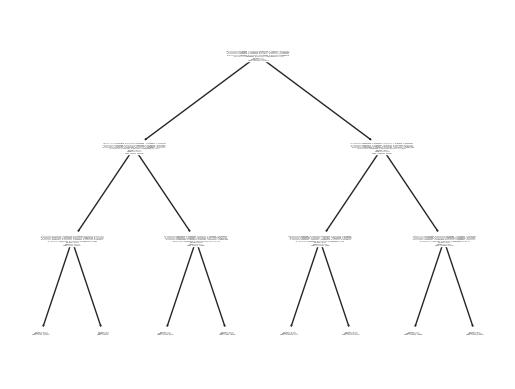

In [69]:
from sklearn import tree
tree.plot_tree(DTR_model_smote, feature_names=X_train_smote)

# Random forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
RF_model_smote = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
RF_model_smote.fit(X_train_smote, y_train_smote)
y_train_pred = RF_model_smote.predict(X_train_smote)
y_test_pred = RF_model_smote.predict(X_test)
acc_smote_5 = accuracy_score(y_test, y_test_pred)

In [71]:
print('Recall score: %0.4f'% recall_score(y_train_smote, y_train_pred))
print('Precision score: %0.4f'% precision_score(y_train_smote, y_train_pred))
print('F1-Score: %0.4f'% f1_score(y_train_smote, y_train_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_train_smote, y_train_pred))
print('AUC: %0.4f' % roc_auc_score(y_train_smote, y_train_pred))

Recall score: 1.0000
Precision score: 1.0000
F1-Score: 1.0000
Accuracy score: 1.0000
AUC: 1.0000


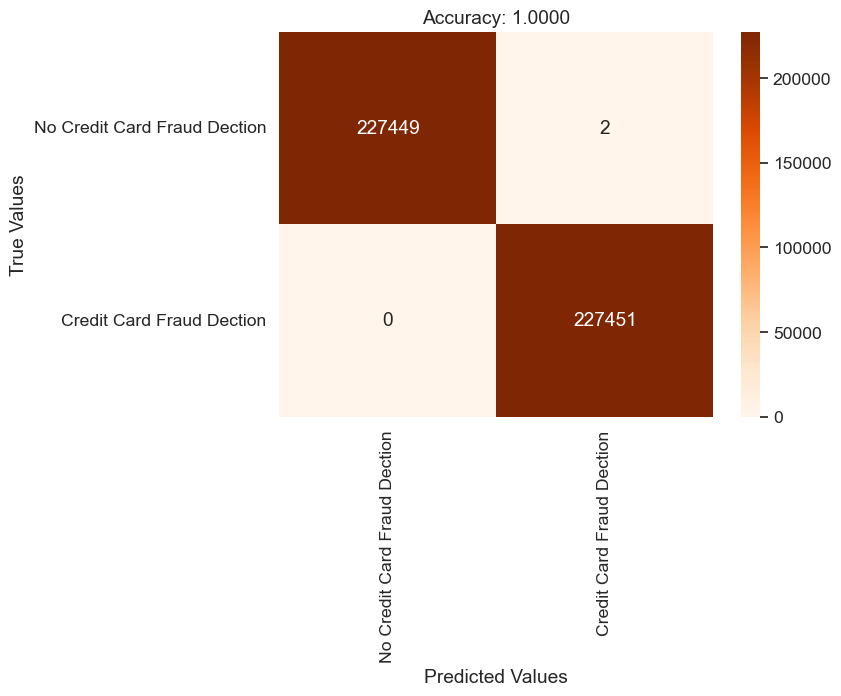



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



In [72]:
Visualize_confusion_matrix(y_train_smote, y_train_pred)

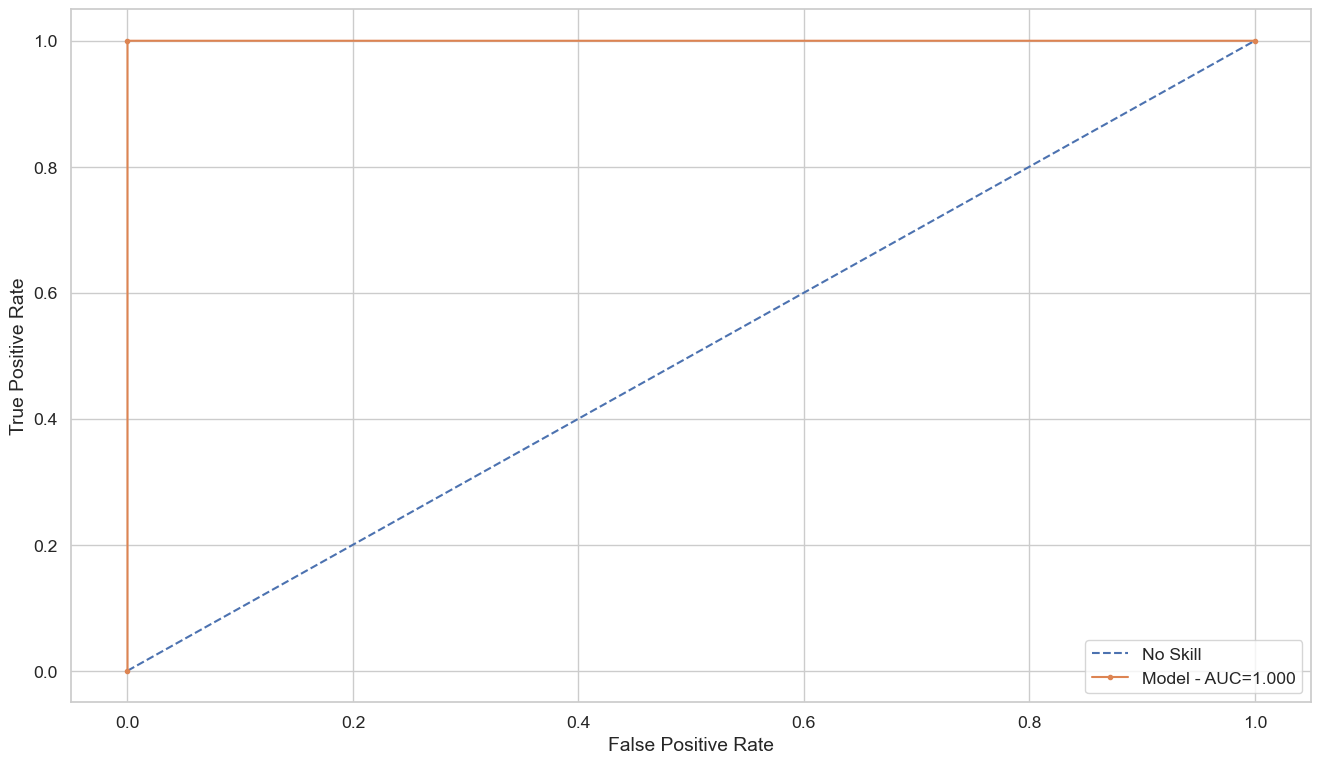

In [73]:
ROC_AUC(y_train_smote, y_train_pred)

In [74]:
print('Recall score: %0.4f'% recall_score(y_test, y_test_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_test_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_test_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_test_pred))
print('AUC: %0.4f' % roc_auc_score(y_test, y_test_pred))
a4=(round(recall_score(y_test, y_test_pred),4))
b4=(round(precision_score(y_test, y_test_pred),4))
c4=(round(f1_score(y_test, y_test_pred),4))
d4=(round(accuracy_score(y_test, y_test_pred),4))
e4=(round(roc_auc_score(y_test, y_test_pred),4))

Recall score: 0.8469
Precision score: 0.8300
F1-Score: 0.8384
Accuracy score: 0.9994
AUC: 0.9233


In [75]:
print(a4)
print(b4)
print(c4)
print(d4)
print(e4)

0.8469
0.83
0.8384
0.9994
0.9233


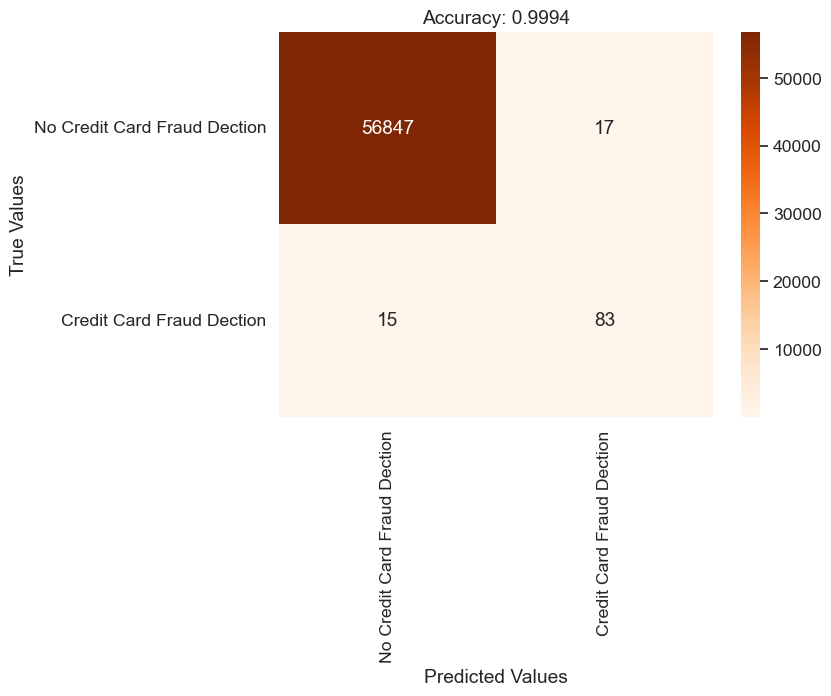



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.85      0.84        98

    accuracy                           1.00     56962
   macro avg       0.91      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [76]:
Visualize_confusion_matrix(y_test, y_test_pred)

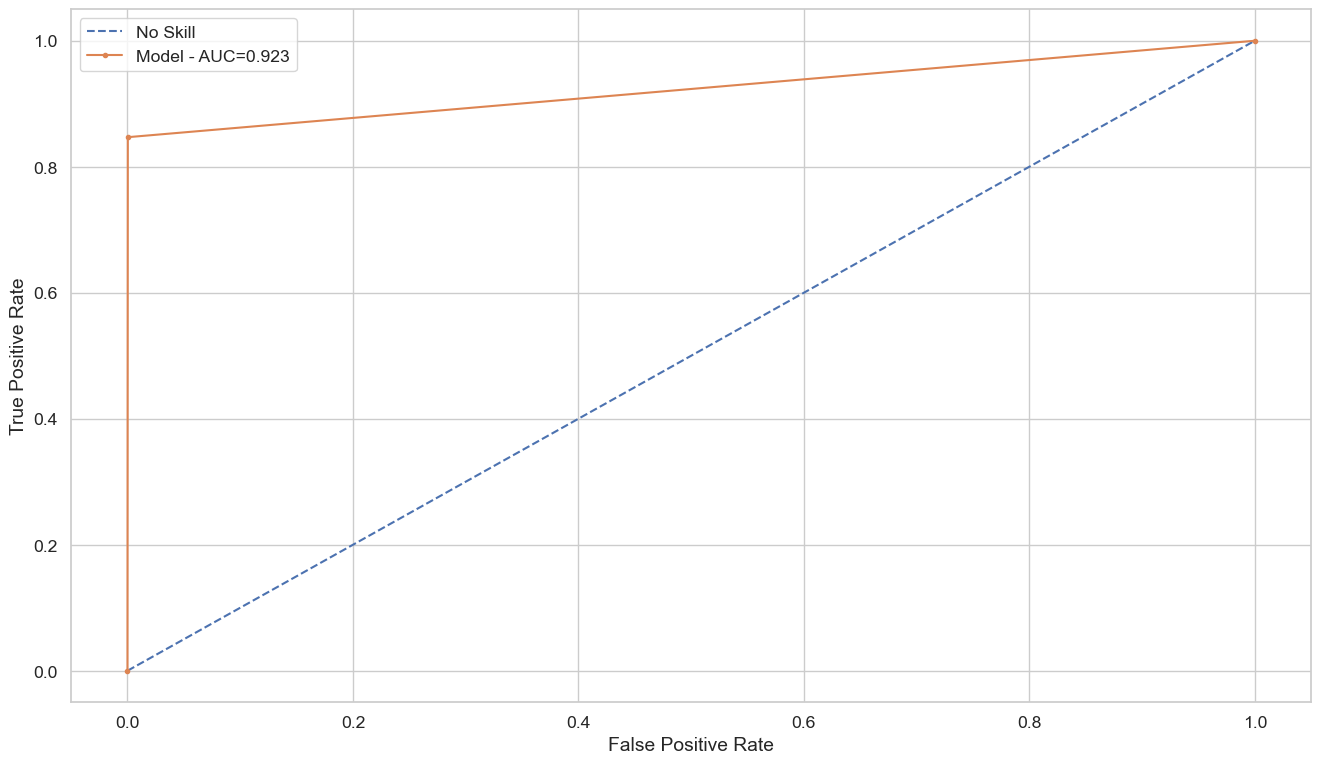

In [77]:
ROC_AUC(y_test, y_test_pred)

# XGBoost

In [78]:
pip install xgboost --user

In [79]:
from xgboost import XGBClassifier
XGB_model_smote = XGBClassifier()
XGB_model_smote.fit(X_train_smote, y_train_smote)
y_train_pred = XGB_model_smote.predict(X_train_smote)
y_test_pred = XGB_model_smote.predict(X_test)
acc_smote_6 = accuracy_score(y_test, y_test_pred)

In [80]:
print('Recall score: %0.4f'% recall_score(y_train_smote, y_train_pred))
print('Precision score: %0.4f'% precision_score(y_train_smote, y_train_pred))
print('F1-Score: %0.4f'% f1_score(y_train_smote, y_train_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_train_smote, y_train_pred))
print('AUC: %0.4f' % roc_auc_score(y_train_smote, y_train_pred))

Recall score: 1.0000
Precision score: 1.0000
F1-Score: 1.0000
Accuracy score: 1.0000
AUC: 1.0000


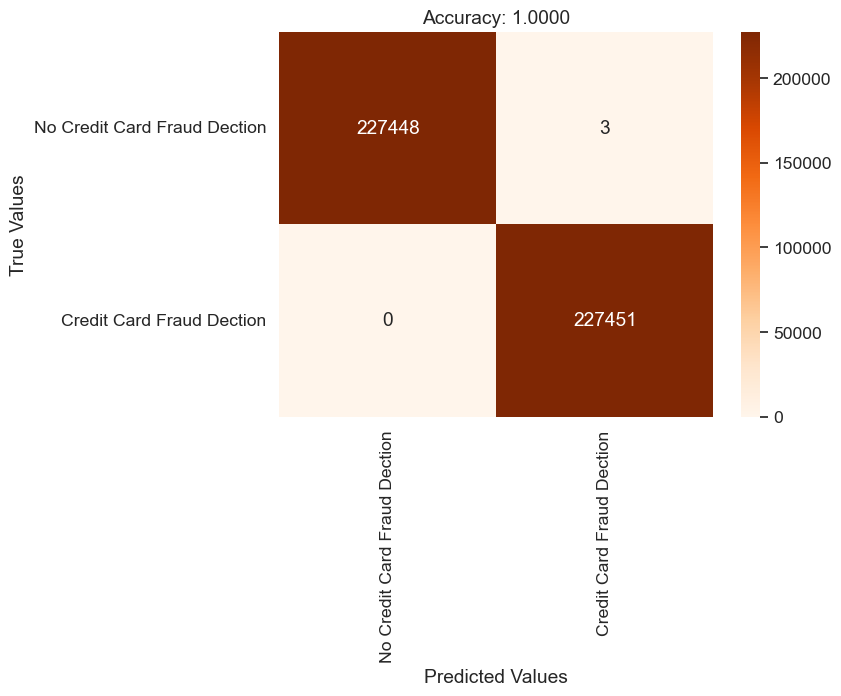



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



In [81]:
Visualize_confusion_matrix(y_train_smote, y_train_pred)

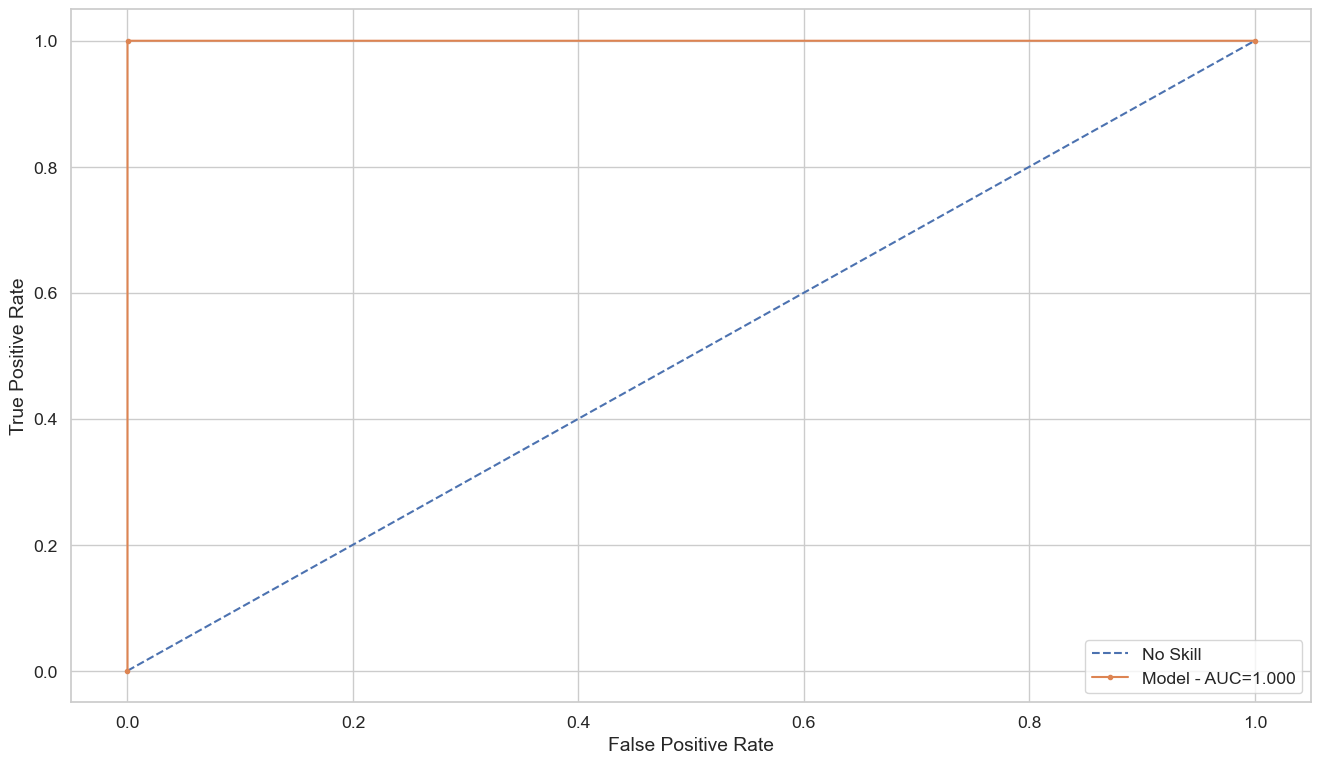

In [82]:
ROC_AUC(y_train_smote, y_train_pred)

In [83]:
print('Recall score: %0.4f'% recall_score(y_test, y_test_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_test_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_test_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_test_pred))
print('AUC: %0.4f' % roc_auc_score(y_test, y_test_pred))
a5=(round(recall_score(y_test, y_test_pred),4))
b5=(round(precision_score(y_test, y_test_pred),4))
c5=(round(f1_score(y_test, y_test_pred),4))
d5=(round(accuracy_score(y_test, y_test_pred),4))
e5=(round(roc_auc_score(y_test, y_test_pred),4))

Recall score: 0.8571
Precision score: 0.6720
F1-Score: 0.7534
Accuracy score: 0.9990
AUC: 0.9282


In [84]:
print(a5)
print(b5)
print(c5)
print(d5)
print(e5)

0.8571
0.672
0.7534
0.999
0.9282


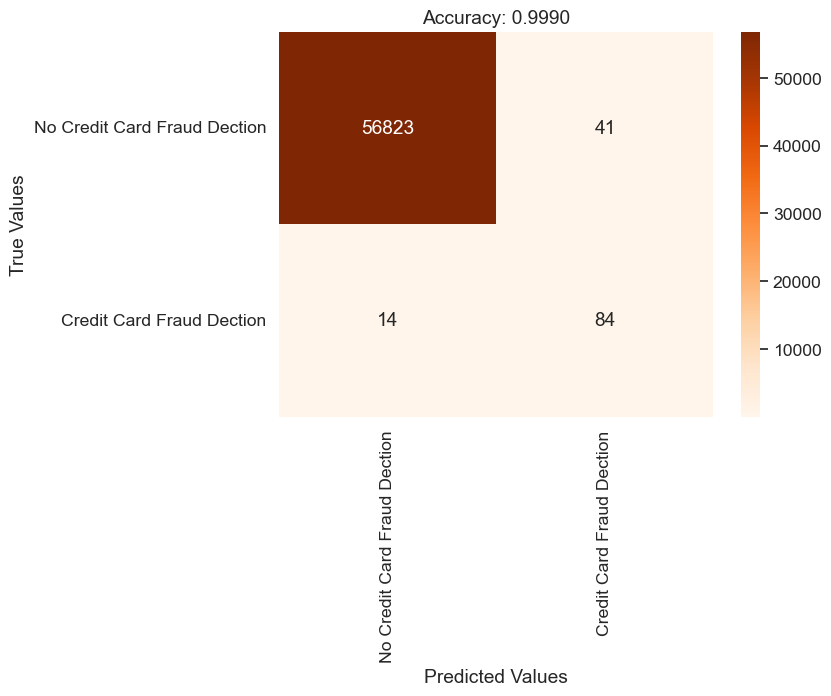



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.67      0.86      0.75        98

    accuracy                           1.00     56962
   macro avg       0.84      0.93      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [85]:
Visualize_confusion_matrix(y_test, y_test_pred)

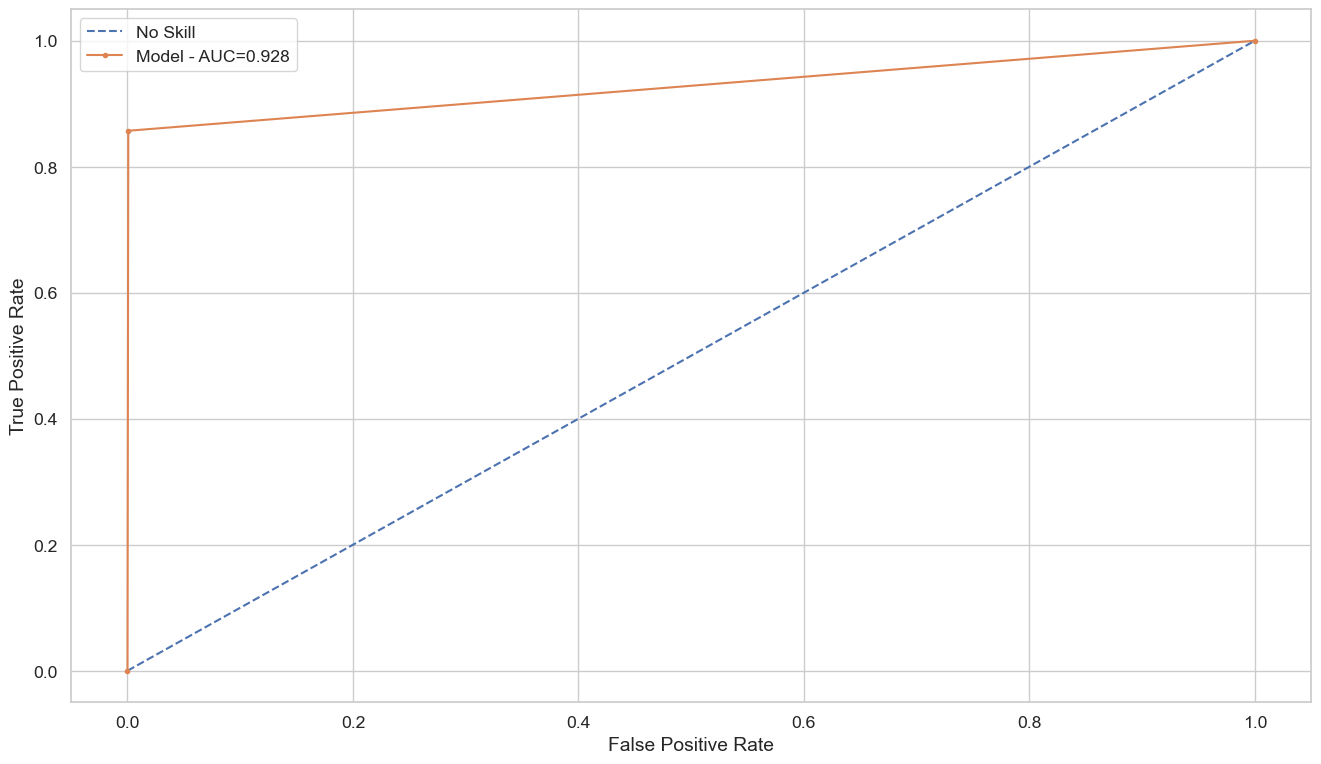

In [86]:
ROC_AUC(y_test, y_test_pred)

In [87]:
#SVM
a6=0.9184
b6=0.0521
c6=0.0985
d6=0.9711
e6=0.9448

In [88]:
#KNN
a7=0.8776
b7=0.4343
c7=0.5811
d7=0.9978
e7=0.9378

# Comparing the algorithms

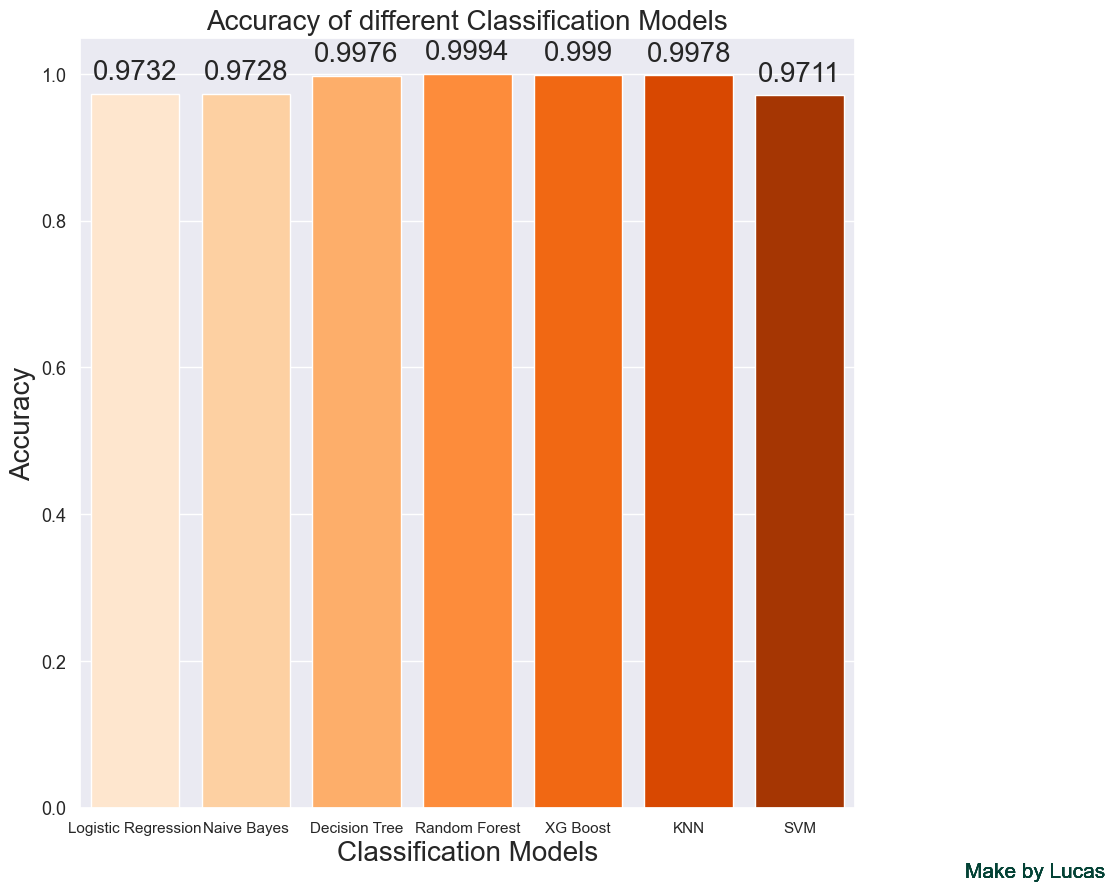

In [89]:
mylist=[]
mylist2=[]

mylist.append(acc_smote_1)
mylist2.append("Logistic Regression")
mylist.append(acc_smote_2)
mylist2.append("Naive Bayes")
mylist.append(acc_smote_4)
mylist2.append("Decision Tree")
mylist.append(acc_smote_5)
mylist2.append("Random Forest")
mylist.append(acc_smote_6)
mylist2.append("XG Boost")
mylist.append(0.9978)
mylist2.append("KNN")
mylist.append(0.9711)
mylist2.append("SVM")

plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
ax = sns.barplot(x = mylist2, y = mylist, palette = "Oranges", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize =11, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.4}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')

    # Add Text watermark
    plt.text(7.5, -0.1, 'Make by Lucas', fontsize = 15,
             color ='#034235', ha ='left', va ='bottom',
             alpha = 0.7)
       
plt.show();

In [90]:
from sklearn.metrics import roc_curve, auc

In [91]:
y_pred_logistic = LR_model_smote.predict_proba(X_test)[:,1]
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

In [92]:
y_pred_nb = NB_model_smote.predict_proba(X_test)[:,1]
nb_fpr, nb_tpr, threshold = roc_curve(y_test, y_pred_nb)
auc_nb = auc(nb_fpr, nb_tpr)

In [93]:
y_pred_dtr = DTR_model_smote.predict_proba(X_test)[:,1]
dtr_fpr, dtr_tpr, threshold = roc_curve(y_test, y_pred_dtr)
auc_dtr = auc(dtr_fpr, dtr_tpr)

In [94]:
y_pred_rfc = RF_model_smote.predict_proba(X_test)[:,1]
rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

In [95]:
y_pred_xgb = XGB_model_smote.predict_proba(X_test)[:,1]
xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, y_pred_xgb)
auc_xgb = auc(xgb_fpr, xgb_tpr)

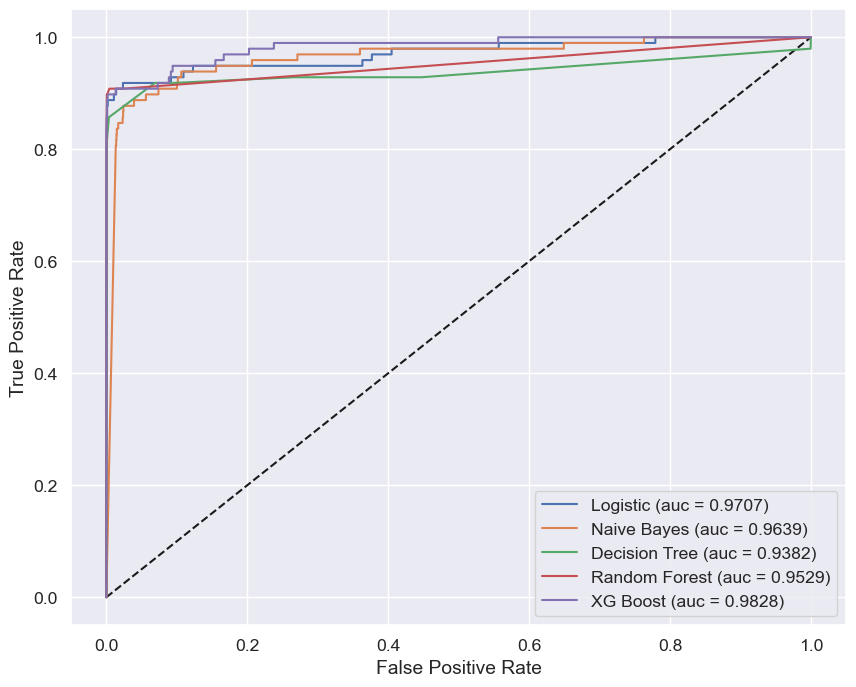

In [96]:
plt.figure(figsize=(10, 8), dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
# Logistic Regression
plt.plot(logistic_fpr, logistic_tpr, label='Logistic (auc = %0.4f)' % auc_logistic)
# Naive Bayes
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (auc = %0.4f)' % auc_nb)
# KNN
#plt.plot(knn_fpr, knn_tpr, label='KNN (auc = %0.4f)' % auc_knn)
# Decision Tree
plt.plot(dtr_fpr, dtr_tpr, label='Decision Tree (auc = %0.4f)' % auc_dtr)
# Random Forest
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest (auc = %0.4f)' % auc_rfc)
# XGBoost
plt.plot(xgb_fpr, xgb_tpr, label='XG Boost (auc = %0.4f)' % auc_xgb)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.show();

In [97]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [98]:
from prettytable import PrettyTable
myTable = PrettyTable(["Algorithm", "Recall", "Precision", "F1","Accuracy","AOC"])
myTable.add_row(["Logistic Regression",a1,b1,c1,d1,e1])
myTable.add_row(["Naive Bayes",a2,b2,c2,d2,e2])
myTable.add_row(["Decision Tree", a3,b3,c3,d3,e3])
myTable.add_row(["Random Forest", a4,b4,c4,d4,e4])
myTable.add_row(["XG Boost", a5,b5,c5,d5,e5])
myTable.add_row(["SVM", a6,b6,c6,d6,e6])
myTable.add_row(["KNN", a7,b7,c7,d7,e7])

print(myTable)

+---------------------+--------+-----------+--------+----------+--------+
|      Algorithm      | Recall | Precision |   F1   | Accuracy |  AOC   |
+---------------------+--------+-----------+--------+----------+--------+
| Logistic Regression | 0.9184 |   0.056   | 0.1056 |  0.9732  | 0.9459 |
|     Naive Bayes     | 0.8776 |   0.0531  | 0.1001 |  0.9728  | 0.9253 |
|    Decision Tree    | 0.7959 |   0.3959  | 0.5288 |  0.9976  | 0.8969 |
|    Random Forest    | 0.8469 |    0.83   | 0.8384 |  0.9994  | 0.9233 |
|       XG Boost      | 0.8571 |   0.672   | 0.7534 |  0.999   | 0.9282 |
|         SVM         | 0.9184 |   0.0521  | 0.0985 |  0.9711  | 0.9448 |
|         KNN         | 0.8776 |   0.4343  | 0.5811 |  0.9978  | 0.9378 |
+---------------------+--------+-----------+--------+----------+--------+
